## FINAL PROJECT.

### Client: AtliQ Hardware.

### AtliQ Hardware is one of the leading computer hardware producers in India, and has even expanded into other countries as well. They sell different types of hardware to big players such as Amazon, Best Buy, and Walmart.<br>
### This year, they're asking PWC to conduct a big audit of their sales and help them automate their existing data.

***

### FINNANCIAL ANALYSIS

#### DECOMPOSITION AND RESEARCH TASKS:

### 1. Definition of Objectives and Key Questions

#### Objective: Understand how revenue, profits, and margins have changed over time. Analyze shifts in the market and identify the most profitable categories.<br>
#### Key Questions:<br>
- How have revenue and profits trended over the years?<br>
- What are the profit margins, and how have they evolved?<br>
- Which markets, platforms, or channels have driven the most revenue and profit?<br>
- What categories of products are the most profitable?<br>
- How have different regions/subzones contributed to revenue and profit?<br>
- Are there any noticeable shifts in market trends or customer preferences?

***

### 2. Identify the Important Metrics

#### Revenue Metrics:<br>
- Total Revenue: The total income generated from sales before any expenses are subtracted.
- Total Sales Volume: The total number of units sold.
#### Profit Metrics:
- Total Gross Profit: The total profit the company makes after subtracting the cost of goods sold (COGS) from revenue.
- Customer Lifetime Value: The total gross profit expected from a customer over the entire duration of their relationship with the company.
- Discounts Customer: The total discounts provided to each customer. Useful for evaluating the impact of discounts on profitability.
- Profit Margin:  To assess the profitability of the company as a whole, a specific product line, or a business unit. It gives a direct understanding of overall profitability.<br>
#### Market and Category Metrics:
- Revenue, Profit, Sales Volume, Costs per Unit by Market, Platform and Channel.
- Revenue by Customer: Revenue broken down by customer.
- Profit by Customer: Profitability by customer.
- Total Sales Volume per Customer: The total number of units sold to each customer.
- Gross Profit per Customer: The total gross profit generated by each customer (revenue minus the cost of goods sold).
- Costs per Unit: The average manufacturing cost per unit of product.
- Revenue per Customer: The total revenue generated from each customer.
- Frequency Purchase by Customer: The number of times a customer makes a purchase within a specific period.
- Churn Customer Segment: The rate at which customers stop doing business over a period of time.
- Market Segment Contribution: The contribution of each customer to different market segments.
#### Trend Metrics:<br>
- Market Share: Proportion of total revenue by market.
- Revenue/Profit by Year: Trend of revenue and profit over time (fiscal_year).

***

### 3. Data Preparation and Cleaning

#### Data Integrity Check:<br>
- Ensure each market belongs to one sub_zone and region.
- Validate that each customer has only one associated platform.
- Check that product_code is consistent across all fact tables.
- Verify that there are only 3 unique values in the division column of the dim_product table.
#### Handle Missing Data:<br>
- Identify and address missing values in key columns like gross_price, manufacturing_cost, and sold_quantity.
- Impute or remove records with missing data as appropriate.
#### Feature Engineering:<br>
- Create new features for further analysis.
- Aggregate data by fiscal_year, market, platform, etc., to facilitate trend analysis.

#### Import libraries:

In [547]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import seaborn as sns

In [159]:
con = sqlite3.connect('/Users/cesarchaparro/Desktop/TripleTen/Sprint_12/Final_Project/atliq_db.sqlite3')

In [160]:
cursor = con.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())

[('dim_customer',), ('fact_pre_discount',), ('fact_manufacturing_cost',), ('fact_gross_price',), ('fact_sales_monthly',), ('fact_manufacturing_renamed',), ('dim_product',), ('metrics_by_product',), ('all_combinations_metrics',)]


#### DATA INTEGRITY CHECK AND HANDLING MISSING DATA

#### Open each table individually

#### 1. Customer table:

In [161]:
# opening the customer table
query = """Select * from 
dim_customer
"""
dim_customer = pd.read_sql_query(query, con)
dim_customer.head(10)

,customer_code,customer,platform,channel,market,sub_zone,region
0,70002017,Atliq Exclusive,Brick & Mortar,Direct,India,India,APAC
1,70002018,Atliq e Store,E-Commerce,Direct,India,India,APAC
2,70003181,Atliq Exclusive,Brick & Mortar,Direct,Indonesia,ROA,APAC
3,70003182,Atliq e Store,E-Commerce,Direct,Indonesia,ROA,APAC
4,70004069,Atliq Exclusive,Brick & Mortar,Direct,Japan,ROA,APAC
5,70004070,Atliq e Store,E-Commerce,Direct,Japan,ROA,APAC
6,70005163,Atliq e Store,E-Commerce,Direct,Pakistan,ROA,APAC
7,70006157,Atliq Exclusive,Brick & Mortar,Direct,Philiphines,ROA,APAC
8,70006158,Atliq e Store,E-Commerce,Direct,Philiphines,ROA,APAC
9,70007198,Atliq Exclusive,Brick & Mortar,Direct,South Korea,ROA,APAC


In [162]:
dim_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_code  209 non-null    int64 
 1   customer       209 non-null    object
 2   platform       209 non-null    object
 3   channel        209 non-null    object
 4   market         209 non-null    object
 5   sub_zone       209 non-null    object
 6   region         209 non-null    object
dtypes: int64(1), object(6)
memory usage: 11.6+ KB


In [163]:
query = """SELECT customer, COUNT(DISTINCT platform) AS platform_count
FROM dim_customer
GROUP BY customer
HAVING COUNT(DISTINCT platform) > 1;
"""
result = pd.read_sql_query(query, con)
print(result)

Empty DataFrame
Columns: [customer, platform_count]
Index: []


##### There are no customer who have more than one platform. Each customer has one platform.

In [164]:
query = """SELECT market, 
       COUNT(DISTINCT sub_zone) AS distinct_subzones, 
       COUNT(DISTINCT region) AS distinct_regions
FROM dim_customer
GROUP BY market
HAVING distinct_subzones > 1 OR distinct_regions > 1;
"""
result = pd.read_sql_query(query, con)
print(result)


Empty DataFrame
Columns: [market, distinct_subzones, distinct_regions]
Index: []


##### Each market has been checked as having only 1 subzone and 1 region under it.

***

#### 2. Product table:

In [165]:
# opening the product table
query = """Select * from 
dim_product
"""
dim_product = pd.read_sql_query(query, con)
dim_product.head()

,product_code,division,segment,category,product,variant
0,A0118150101,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Standard
1,A0118150102,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Plus
2,A0118150103,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Premium
3,A0118150104,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Premium Plus
4,A0219150201,P & A,Peripherals,Internal HDD,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,Standard


In [166]:
dim_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_code  397 non-null    object
 1   division      397 non-null    object
 2   segment       397 non-null    object
 3   category      397 non-null    object
 4   product       397 non-null    object
 5   variant       397 non-null    object
dtypes: object(6)
memory usage: 18.7+ KB


#### I will check if there are actually 3 unique values on the division column or there is presence of data to be cleaned.

In [167]:
query = """SELECT COUNT(DISTINCT division) as unique_divisions 
FROM dim_product;
"""
result = pd.read_sql_query(query, con)
print(result)

if result['unique_divisions'][0] == 3:
    print("There are exactly 3 unique values in the 'division' column.")
else:
    print(f"There are {result['unique_divisions'][0]} unique values in the 'division' column.")

   unique_divisions
0                 3
There are exactly 3 unique values in the 'division' column.


##### After verifying the column I can conclude that there are only 3 types of divisions on the column.

#### I will check if there are actually 6 unique values on the segment column or there is presence of data to be cleaned.

In [168]:
query = """SELECT COUNT(DISTINCT segment) as unique_segments 
FROM dim_product;
"""
result = pd.read_sql_query(query, con)
print(result)

if result['unique_segments'][0] == 6:
    print("There are exactly 6 unique values in the 'segment' column.")
else:
    print(f"There are {result['unique_segments'][0]} unique values in the 'segment' column.")

   unique_segments
0                6
There are exactly 6 unique values in the 'segment' column.


##### After verifying the segments column I can conclude that there are only 6 types of segments on the column.

#### Check for unique categories.

In [169]:
# query to get unique categories
query = """
SELECT DISTINCT category
FROM dim_product;
"""
unique_categories_df = pd.read_sql_query(query, con)
unique_categories_df

,category
0,Internal HDD
1,Graphic Card
2,Processors
3,MotherBoard
4,Mouse
5,Keyboard
6,Batteries
7,Personal Laptop
8,Business Laptop
9,Gaming Laptop


In [170]:
# checking the dim_product table for unique product codes
query = "SELECT DISTINCT product_code FROM dim_product"
dim_product_codes = pd.read_sql_query(query, con)
dim_product_codes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_code  397 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


#### After checking the unique codes for each product we can see that there are no duplicates, missing or abnormal codes. Each product code has a unique value.

#### Product codes are also used in other related tables, such as fact_manufacturing_cost, fact_gross_price, and fact_sales_monthly. I will check further on the other tables to see if there are duplicates, missing or abnormal codes.

***

#### 3. Discounts table:

In [171]:
# opening the discounts applied to customers table
query = """Select * from 
fact_pre_discount
"""
fact_pre_discount = pd.read_sql_query(query, con)
fact_pre_discount.head(10)

,customer_code,fiscal_year,pre_invoice_discount_pct
0,70002017,2018,0.0824
1,70002017,2019,0.0777
2,70002017,2020,0.0735
3,70002017,2021,0.0703
4,70002017,2022,0.1057
5,70002018,2018,0.2956
6,70002018,2019,0.2577
7,70002018,2020,0.2255
8,70002018,2021,0.2061
9,70002018,2022,0.2931


In [172]:
fact_pre_discount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045 entries, 0 to 1044
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_code             1045 non-null   int64  
 1   fiscal_year               1045 non-null   int64  
 2   pre_invoice_discount_pct  1045 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 24.6 KB


In [173]:
# count the number of rows with a pre_invoice_discount_pct of 0
query = """SELECT COUNT(*)
FROM fact_pre_discount
WHERE pre_invoice_discount_pct = 0
"""
zero_discount = pd.read_sql_query(query, con)
zero_discount

,COUNT(*)
0,0


#### There are no products with discount value as 0 and therefore no missing values.

#### 4. Costs table:

In [174]:
# opening the cost table
query = """Select * from 
fact_manufacturing_cost
"""
fact_manufacturing_cost = pd.read_sql_query(query, con)
fact_manufacturing_cost.head(10)

,product_code,cost_year,manufacturing_cost
0,A0118150101,2018,4.6190
1,A0118150101,2019,4.2033
2,A0118150101,2020,5.0207
3,A0118150101,2021,5.5172
4,A0118150102,2018,5.6036
5,A0118150102,2019,5.3235
6,A0118150102,2020,5.7180
7,A0118150102,2021,6.2835
8,A0118150103,2018,5.9469
9,A0118150103,2019,5.5306


In [175]:
fact_manufacturing_cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1182 entries, 0 to 1181
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_code        1182 non-null   object 
 1   cost_year           1182 non-null   int64  
 2   manufacturing_cost  1182 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 27.8+ KB


In [176]:
missing_values_cost = fact_manufacturing_cost.isnull().sum()
print(missing_values_cost)

product_code          0
cost_year             0
manufacturing_cost    0
dtype: int64


In [177]:
# count the number of rows with a manufacturing_cost of 0
query = """SELECT COUNT(*)
FROM fact_manufacturing_cost
WHERE manufacturing_cost = 0
"""
zero_manufacturing_cost = pd.read_sql_query(query, con)
zero_manufacturing_cost

,COUNT(*)
0,0


#### There are no products with cost value as 0 and therefore no missing values.

In [178]:
# query to get unique values from the cost_year column
query = """
SELECT DISTINCT cost_year
FROM fact_manufacturing_cost;
"""
manufacturing_years = pd.read_sql_query(query, con)
print(manufacturing_years)

   cost_year
0       2018
1       2019
2       2020
3       2021
4       2022


#### Years of production are from 2018 to 2022.

#### There are 1182 values on the column. I will analyze further.

#### Product codes are also used in fact_manufacturing_cost table, so to check for consistency.

In [179]:
# count the frequency of each product_code
frequency_codes = pd.read_sql_query("""SELECT product_code, COUNT(*) AS frequency
FROM fact_manufacturing_cost
GROUP BY product_code;
""", con)
frequency_codes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389 entries, 0 to 388
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_code  389 non-null    object
 1   frequency     389 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 6.2+ KB


#### There are 389 unique value codes.

In [180]:
# to see how many product codes appear exactly once, more than once, etc.
more_frequent_codes = pd.read_sql_query("""SELECT frequency, COUNT(*) AS number_of_product_codes
FROM (
    SELECT product_code, COUNT(*) AS frequency
    FROM fact_manufacturing_cost
    GROUP BY product_code
) AS frequency_table
GROUP BY frequency
ORDER BY frequency DESC;
""", con)
more_frequent_codes

,frequency,number_of_product_codes
0,5,59
1,4,91
2,3,90
3,2,104
4,1,45


#### From this output we can see the distribution of product codes within the column, there are 59 products that appear 5 times, 91 products that appear 4 times, 90 products that appear 3 times, 104 products that appear 2 times and 45 that appear 1 time. Which gives a total of 1182 rows. Now there is an understanding of the column.

#### Now I will check if there are missing codes on this table that appear on the original table of products.

In [181]:
# check for missing product codes
missing_in_fact_manufacturing = dim_product_codes[~dim_product_codes['product_code'].isin(fact_manufacturing_cost['product_code'])]
print("Product codes in dim_product missing in fact_manufacturing_cost:")
print(missing_in_fact_manufacturing)

Product codes in dim_product missing in fact_manufacturing_cost:
    product_code
376  A6718160102
377  A6719160101
382  A6918160303
383  A6919160302
384  A6921160301
385  A7018160402
386  A7019160401
387  A7020160403


#### There are 8 codes that are missing in the fact_manufacturing_cost from the dim_product table.

#### 389 product_codes on this table, 8 missing product_codes from the dim_product table adds up to the values on the dim_products info dataframe of 397 product_codes.

#### Here are the whole rows of the missing codes to check for anomalies on the data.

In [182]:
# query to see the columns of the product_code that are missing on the fact_manufacturing_cost table to see anomalies
missing_codes = ('A6718160102', 'A6719160101', 'A6918160303', 'A6919160302', 
                 'A6921160301', 'A7018160402', 'A7019160401', 'A7020160403')

query = f"""
SELECT * FROM dim_product
WHERE product_code IN {missing_codes}
"""

missing_product_info = pd.read_sql_query(query, con)
missing_product_info

,product_code,division,segment,category,product,variant
0,A6718160102,N & S,Storage,USB Flash Drives,AQ Pen Drive 2 IN 1,Plus
1,A6719160101,N & S,Storage,USB Flash Drives,AQ Pen Drive 2 IN 1,Standard
2,A6918160303,N & S,Storage,USB Flash Drives,AQ Ultra Dual 2.0,Premium
3,A6919160302,N & S,Storage,USB Flash Drives,AQ Ultra Dual 2.0,Plus
4,A6921160301,N & S,Storage,USB Flash Drives,AQ Ultra Dual 2.0,Standard
5,A7018160402,N & S,Storage,USB Flash Drives,AQ Ultra Dual 3.0,Plus
6,A7019160401,N & S,Storage,USB Flash Drives,AQ Ultra Dual 3.0,Standard
7,A7020160403,N & S,Storage,USB Flash Drives,AQ Ultra Dual 3.0,Premium


#### Apparently there are no anomalies on the data itself. I will analyze the situation further.

#### My conclusion will show on the last table below.

#### I want to ensure that there are no product codes in the fact_manufacturing_cost that do not exist in the dim_product table.

In [183]:
# check for product codes in fact_manufacturing_cost that are not in dim_product
extra_in_fact_manufacturing = fact_manufacturing_cost[~fact_manufacturing_cost['product_code'].isin(dim_product_codes['product_code'])]
print("Product codes in fact_manufacturing_cost not found in dim_product:")
print(extra_in_fact_manufacturing)

Product codes in fact_manufacturing_cost not found in dim_product:
Empty DataFrame
Columns: [product_code, cost_year, manufacturing_cost]
Index: []


#### There are in fact no product codes in the cost table that don't exist in the product table.

#### 5. Pricing table:

In [184]:
# opening the prices table
query = """Select * from 
fact_gross_price
"""
fact_gross_price = pd.read_sql_query(query, con)
fact_gross_price.head(10)

,product_code,fiscal_year,gross_price
0,A0118150101,2018,15.3952
1,A0118150101,2019,14.4392
2,A0118150101,2020,16.2323
3,A0118150101,2021,19.0573
4,A0118150102,2018,19.5875
5,A0118150102,2019,18.5595
6,A0118150102,2020,19.8577
7,A0118150102,2021,21.4565
8,A0118150103,2018,19.3630
9,A0118150103,2019,19.3442


In [185]:
fact_gross_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1182 entries, 0 to 1181
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_code  1182 non-null   object 
 1   fiscal_year   1182 non-null   int64  
 2   gross_price   1182 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 27.8+ KB


In [186]:
missing_values_price = fact_gross_price.isnull().sum()
print(missing_values_price)

product_code    0
fiscal_year     0
gross_price     0
dtype: int64


In [187]:
# count the number of rows with a gross_price of 0
query = """SELECT COUNT(*)
FROM fact_gross_price
WHERE gross_price = 0
"""
zero_gross_price = pd.read_sql_query(query, con)
zero_gross_price

,COUNT(*)
0,0


#### There are no rows with value 0 as price. Therefore I conclude that the price values are correct and there are no missing values.

#### Product codes are also used in fact_gross_price table.

In [188]:
# query to fetch all unique product codes from fact_gross_price
query = "SELECT DISTINCT product_code FROM fact_gross_price"
fact_gross_price_codes = pd.read_sql_query(query, con)
fact_gross_price_codes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389 entries, 0 to 388
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_code  389 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [189]:
# check for missing product codes
missing_in_fact_gross_price = dim_product_codes[~dim_product_codes['product_code'].isin(fact_gross_price_codes['product_code'])]
print("Product codes in dim_product missing in fact_gross_price:")
print(missing_in_fact_gross_price)

Product codes in dim_product missing in fact_gross_price:
    product_code
376  A6718160102
377  A6719160101
382  A6918160303
383  A6919160302
384  A6921160301
385  A7018160402
386  A7019160401
387  A7020160403


#### The same codes missing on the cost table are also missing on the price table.

#### I want to ensure that there are no product codes in the fact_gross_price that do not exist in the dim_product table.

In [190]:
# check for product codes in fact_gross_price that are not in dim_product
extra_in_fact_gross_price = fact_gross_price_codes[~fact_gross_price_codes['product_code'].isin(dim_product_codes['product_code'])]
print("Product codes in fact_gross_price not found in dim_product:")
print(extra_in_fact_gross_price)

Product codes in fact_gross_price not found in dim_product:
Empty DataFrame
Columns: [product_code]
Index: []


#### There are in fact no product codes in the price table that don't exist in the product table.

#### 6. Sales table:

In [191]:
# opening the sales table
query = """Select * from 
fact_sales_monthly
"""
fact_sales_monthly = pd.read_sql_query(query, con)
fact_sales_monthly.head(10)

,date,product_code,customer_code,sold_quantity,fiscal_year
0,2017-09-01,A0118150101,70002017,51,2018
1,2017-09-01,A0118150101,70002018,77,2018
2,2017-09-01,A0118150101,70003181,17,2018
3,2017-09-01,A0118150101,70003182,6,2018
4,2017-09-01,A0118150101,70006157,5,2018
5,2017-09-01,A0118150101,70006158,7,2018
6,2017-09-01,A0118150101,70007198,29,2018
7,2017-09-01,A0118150101,70007199,34,2018
8,2017-09-01,A0118150101,70008169,22,2018
9,2017-09-01,A0118150101,70008170,5,2018


In [192]:
fact_sales_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67250 entries, 0 to 67249
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           67250 non-null  object
 1   product_code   67250 non-null  object
 2   customer_code  67250 non-null  int64 
 3   sold_quantity  67250 non-null  int64 
 4   fiscal_year    67250 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 2.6+ MB


In [193]:
missing_values_sales = fact_sales_monthly.isnull().sum()
print(missing_values_sales)

date             0
product_code     0
customer_code    0
sold_quantity    0
fiscal_year      0
dtype: int64


#### I will check the presence of products on the data frame that were not sold and they were registered as 0 value.

In [194]:
# count the number of rows with a sold_quantity of 0
query = """SELECT COUNT(*)
FROM fact_sales_monthly
WHERE sold_quantity = 0
"""
zero_sold_quantity = pd.read_sql_query(query, con)
zero_sold_quantity

,COUNT(*)
0,72


#### There are 72 products what were not sold.

In [195]:
# query to select rows where sold_quantity is 0
products_with_zero_sales = pd.read_sql_query("""
SELECT *
FROM fact_sales_monthly
WHERE sold_quantity = 0;
""", con)
products_with_zero_sales

,date,product_code,customer_code,sold_quantity,fiscal_year
0,2017-09-01,A0118150101,70012042,0,2018
1,2017-09-01,A0118150101,70012043,0,2018
2,2017-09-01,A0118150101,90012033,0,2018
3,2017-09-01,A0118150101,90012034,0,2018
4,2017-09-01,A0118150101,90012035,0,2018
...,...,...,...,...,...
67,2017-09-01,A0418150104,90012035,0,2018
68,2017-09-01,A0418150104,90012037,0,2018
69,2017-09-01,A0418150104,90012038,0,2018
70,2017-09-01,A0418150104,90012039,0,2018


In [196]:
# query to check if the 8 specific product codes are among the products with sold_quantity = 0
query = """
SELECT *
FROM fact_sales_monthly
WHERE sold_quantity = 0
AND product_code IN (
    'A6718160102', 
    'A6719160101', 
    'A6918160303', 
    'A6919160302', 
    'A6921160301', 
    'A7018160402', 
    'A7019160401', 
    'A7020160403'
);
"""
filtered_sales_monthly = pd.read_sql_query(query, con)
print(filtered_sales_monthly)

Empty DataFrame
Columns: [date, product_code, customer_code, sold_quantity, fiscal_year]
Index: []


#### I double checked using the sold_quantity column to see if these 8 products were sold. Now is clear that these products have no record of being sold.

#### Product codes are also used in fact_sales_monthly table.

In [197]:
# query to check for product codes with multiple counts
duplicate_product_codes = pd.read_sql_query("""
SELECT product_code, COUNT(*) AS frequency
FROM fact_sales_monthly
GROUP BY product_code
HAVING COUNT(*) > 1
ORDER BY frequency DESC;
""", con)
print(duplicate_product_codes)

   product_code  frequency
0   A0118150104       6643
1   A0118150103       6635
2   A0418150103       6593
3   A0118150101       6005
4   A0118150102       6003
5   A0219150202       5747
6   A0219150201       5745
7   A0220150203       4318
8   A0320150301       4314
9   A0418150101       4100
10  A0418150102       4097
11  A0321150303       2508
12  A0321150302       2508
13  A0418150104       2034


In [198]:
# query to sum frequencies of product codes that appear more than once
total_frequency = pd.read_sql_query("""
SELECT SUM(frequency) AS total_frequency
FROM (
    SELECT product_code, COUNT(*) AS frequency
    FROM fact_sales_monthly
    GROUP BY product_code
    HAVING COUNT(*) > 1
) AS frequency_table;
""", con)
# Print the total frequency
print(total_frequency)

   total_frequency
0            67250


#### If we sum up each frequency we have the total of rows of 67250. There are no other missing or abnormal product_codes.

#### Conclusion about the 8 missing products on several tables:<br>
#### - These products could have been part of the product catalog but were either discontinued or never actually sold or stocked. This might be a result of these products being introduced but then removed from the system before any transactions could occur.<br>
#### - There may be a data entry or integration issue where these products were incorrectly entered into the dim_product table but were never correctly linked to any transactions or cost records.<br>
#### - It’s possible that these products were planned for introduction but were never actually put into production or sold. This could be due to strategic business decisions, market demand assessments, or other operational reasons.<br>
#### - There might be flaws in the data entry or processing systems that resulted in these products not being properly linked across tables.

#### I will not delete these produc_codes from the dataframe since it doesn't affect or influence my analysis on finnances and I don't see any anomalies on the data itself.

#### I asume that products that are newly added to the inventory may not yet have any sales recorded. If these products have been recently introduced, there might be no sales data for them yet.

#### FEATURE ENGINEERING

#### 2. Create new features:<br>
- total_gross_profit<br>
- profit_margin<br>
- total_revenue<br>
- total_sales_volume<br>
- cost_per_unit<br>
- revenue_per_customer<br>
- gross_profit_per_customer<br>
- total_sales_volume_per_customer<br>
- customer_lifetime_value<br>
- discounts_customer<br>
- frequency_purchase_customer<br>
- churn_customer_segment<br>
- market_contribution


***

#### Aggregate the data by Fiscal Year.

In [199]:
# query to create and aggregate data by fiscal_year
query_fiscal_year = """
WITH gross_profit_calculation AS (
    SELECT 
        fsm.product_code,
        fsm.customer_code,
        fsm.sold_quantity,
        fsm.fiscal_year,
        fgp.gross_price,
        fmc.manufacturing_cost,
        (fgp.gross_price - fmc.manufacturing_cost) AS gross_profit_per_unit,
        (fsm.sold_quantity * (fgp.gross_price - fmc.manufacturing_cost)) AS gross_profit
    FROM 
        fact_sales_monthly fsm
    INNER JOIN 
        fact_gross_price fgp ON fsm.product_code = fgp.product_code AND fsm.fiscal_year = fgp.fiscal_year
    INNER JOIN 
        fact_manufacturing_cost fmc ON fsm.product_code = fmc.product_code AND fsm.fiscal_year = fmc.cost_year
),
total_revenue AS (
    SELECT 
        fsm.fiscal_year,
        SUM(fsm.sold_quantity * fgp.gross_price) AS total_revenue
    FROM 
        fact_sales_monthly fsm
    JOIN 
        fact_gross_price fgp ON fsm.product_code = fgp.product_code AND fsm.fiscal_year = fgp.fiscal_year
    GROUP BY 
        fsm.fiscal_year
),
total_sales_volume AS (
    SELECT 
        fsm.fiscal_year,
        SUM(fsm.sold_quantity) AS total_sales_volume
    FROM 
        fact_sales_monthly fsm
    GROUP BY 
        fsm.fiscal_year
),
cost_per_unit_calculation AS (
    SELECT
        fsm.fiscal_year,
        AVG(fmc.manufacturing_cost) AS cost_per_unit
    FROM
        fact_sales_monthly fsm
    INNER JOIN
        fact_manufacturing_cost fmc ON fsm.product_code = fmc.product_code AND fsm.fiscal_year = fmc.cost_year
    GROUP BY
        fsm.fiscal_year
),
aggregated_data AS (
    SELECT 
        gp.fiscal_year,
        SUM(gp.gross_profit) AS total_gross_profit,
        (SUM(gp.gross_profit) / SUM(fsm.sold_quantity * fgp.gross_price)) * 100 AS profit_margin
    FROM 
        gross_profit_calculation gp
    INNER JOIN 
        fact_sales_monthly fsm ON gp.product_code = fsm.product_code AND gp.fiscal_year = fsm.fiscal_year
    INNER JOIN 
        fact_gross_price fgp ON gp.product_code = fgp.product_code AND gp.fiscal_year = fgp.fiscal_year
    GROUP BY 
        gp.fiscal_year
)
SELECT 
    ad.fiscal_year,
    ad.total_gross_profit,
    ad.profit_margin,
    tr.total_revenue,
    tsv.total_sales_volume,
    cp.cost_per_unit
FROM 
    aggregated_data ad
INNER JOIN 
    total_revenue tr ON ad.fiscal_year = tr.fiscal_year
INNER JOIN 
    total_sales_volume tsv ON ad.fiscal_year = tsv.fiscal_year
INNER JOIN
    cost_per_unit_calculation cp ON ad.fiscal_year = cp.fiscal_year
ORDER BY 
    ad.fiscal_year;
"""
aggregated_by_fiscal_year = pd.read_sql_query(query_fiscal_year, con)
aggregated_by_fiscal_year

,fiscal_year,total_gross_profit,profit_margin,total_revenue,total_sales_volume,cost_per_unit
0,2018,1.846150e+09,70.315197,2.944011e+06,165271,5.306142
1,2019,6.540328e+09,70.324698,6.641604e+06,379519,5.160477
2,2020,1.672449e+10,70.215549,1.317292e+07,640584,6.060071
3,2021,3.256688e+10,70.208220,2.466117e+07,1057943,6.924457
4,2022,1.728183e+10,70.427697,3.913621e+07,1539618,7.576067


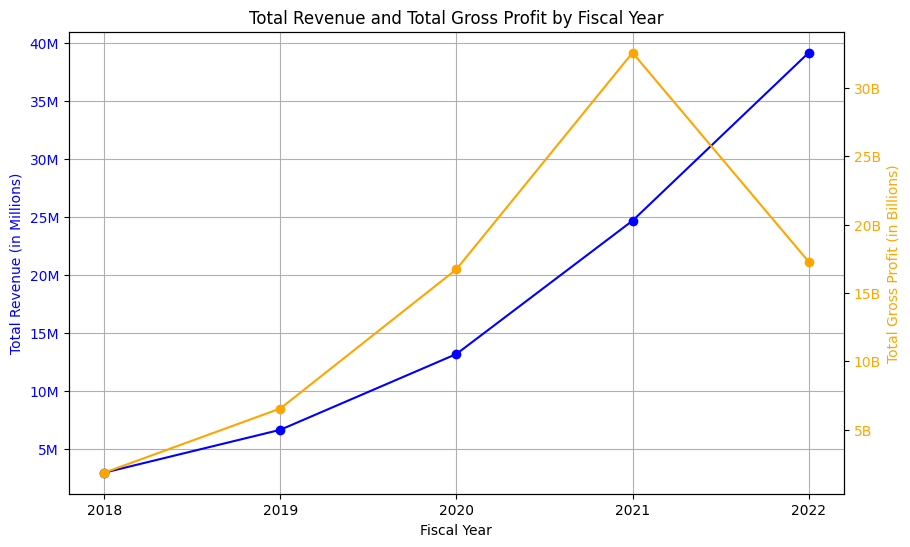

In [200]:
# plotting the results
fig, ax1 = plt.subplots(figsize=(10, 6))

# plot total revenue on the first y-axis
ax1.plot(aggregated_by_fiscal_year['fiscal_year'], aggregated_by_fiscal_year['total_revenue'], marker='o', color='blue', label='Total Revenue')
ax1.set_xlabel('Fiscal Year')
ax1.set_ylabel('Total Revenue (in Millions)', color='blue')

# format the y-axis to show amounts in millions with commas
formatter = ticker.FuncFormatter(lambda x, pos: f'{x*1e-6:,.0f}M')
ax1.yaxis.set_major_formatter(formatter)
ax1.tick_params(axis='y', labelcolor='blue')

# create a second y-axis for the total gross profit
ax2 = ax1.twinx() 
ax2.plot(aggregated_by_fiscal_year['fiscal_year'], aggregated_by_fiscal_year['total_gross_profit'], marker='o', color='orange', label='Total Gross Profit')
ax2.set_ylabel('Total Gross Profit (in Billions)', color='orange')

# format the y-axis to show amounts in billions with commas
formatter2 = ticker.FuncFormatter(lambda x, pos: f'{x*1e-9:,.0f}B')
ax2.yaxis.set_major_formatter(formatter2)
ax2.tick_params(axis='y', labelcolor='orange')
plt.xticks(aggregated_by_fiscal_year['fiscal_year'])

plt.title('Total Revenue and Total Gross Profit by Fiscal Year')
ax1.grid(True)
plt.show()

#### Aggregate the data by Market.

In [344]:
query_market = """
WITH gross_profit_calculation AS (
    SELECT 
        dc.market,
        fsm.product_code,
        fsm.customer_code,
        fsm.sold_quantity,
        fgp.gross_price,
        fmc.manufacturing_cost,
        (fgp.gross_price - fmc.manufacturing_cost) AS gross_profit_per_unit,
        (fsm.sold_quantity * (fgp.gross_price - fmc.manufacturing_cost)) AS gross_profit
    FROM 
        fact_sales_monthly fsm
    INNER JOIN 
        fact_gross_price fgp ON fsm.product_code = fgp.product_code AND fsm.fiscal_year = fgp.fiscal_year
    INNER JOIN 
        fact_manufacturing_cost fmc ON fsm.product_code = fmc.product_code AND fsm.fiscal_year = fmc.cost_year
    INNER JOIN 
        dim_customer dc ON fsm.customer_code = dc.customer_code
),
total_revenue AS (
    SELECT 
        dc.market,
        SUM(fsm.sold_quantity * fgp.gross_price) AS total_revenue
    FROM 
        fact_sales_monthly fsm
    JOIN 
        fact_gross_price fgp ON fsm.product_code = fgp.product_code AND fsm.fiscal_year = fgp.fiscal_year
    JOIN 
        dim_customer dc ON fsm.customer_code = dc.customer_code
    GROUP BY 
        dc.market
),
total_sales_volume AS (
    SELECT 
        dc.market,
        SUM(fsm.sold_quantity) AS total_sales_volume
    FROM 
        fact_sales_monthly fsm
    JOIN 
        dim_customer dc ON fsm.customer_code = dc.customer_code
    GROUP BY 
        dc.market
),
cost_per_unit_calculation AS (
    SELECT
        dc.market,
        AVG(fmc.manufacturing_cost) AS cost_per_unit
    FROM
        fact_sales_monthly fsm
    INNER JOIN
        fact_manufacturing_cost fmc ON fsm.product_code = fmc.product_code AND fsm.fiscal_year = fmc.cost_year
    INNER JOIN 
        dim_customer dc ON fsm.customer_code = dc.customer_code
    GROUP BY
        dc.market
),
aggregated_data AS (
    SELECT 
        gp.market,
        SUM(gp.gross_profit) AS total_gross_profit,
        (SUM(gp.gross_profit) / SUM(fsm.sold_quantity * fgp.gross_price)) * 100 AS profit_margin
    FROM 
        gross_profit_calculation gp
    INNER JOIN 
        fact_sales_monthly fsm ON gp.product_code = fsm.product_code AND gp.customer_code = fsm.customer_code
    INNER JOIN 
        fact_gross_price fgp ON gp.product_code = fgp.product_code AND fsm.fiscal_year = fgp.fiscal_year
    GROUP BY 
        gp.market
)
SELECT 
    ad.market,
    ad.total_gross_profit,
    ad.profit_margin,
    tr.total_revenue,
    tsv.total_sales_volume,
    cp.cost_per_unit
FROM 
    aggregated_data ad
INNER JOIN 
    total_revenue tr ON ad.market = tr.market
INNER JOIN 
    total_sales_volume tsv ON ad.market = tsv.market
INNER JOIN
    cost_per_unit_calculation cp ON ad.market = cp.market
ORDER BY 
    ad.market;
"""
aggregated_by_market = pd.read_sql_query(query_market, con)
aggregated_by_market.to_sql('aggregated_by_market', con, if_exists='replace', index=False)
aggregated_by_market

,market,total_gross_profit,profit_margin,total_revenue,total_sales_volume,cost_per_unit
0,Australia,6.320179e+07,70.301788,3.192199e+06,141088,6.039846
1,Austria,3.443526e+06,70.293106,3.165553e+05,12974,6.772664
2,Bangladesh,1.573540e+07,70.322413,9.202568e+05,39487,6.210698
3,Brazil,4.065350e+06,70.280184,1.945935e+05,9277,6.040925
4,Canada,8.938911e+07,70.293721,4.543901e+06,197068,6.041269
5,Chile,7.739266e+05,70.291109,6.526808e+04,2715,6.708196
6,China,4.868727e+07,70.335607,2.532771e+06,107637,6.041905
7,Columbia,1.927218e+05,70.400695,1.849502e+04,759,6.783684
8,France,6.697413e+07,70.292285,3.367269e+06,147853,6.039973
9,Germany,3.532801e+07,70.326425,2.015373e+06,88915,6.190767


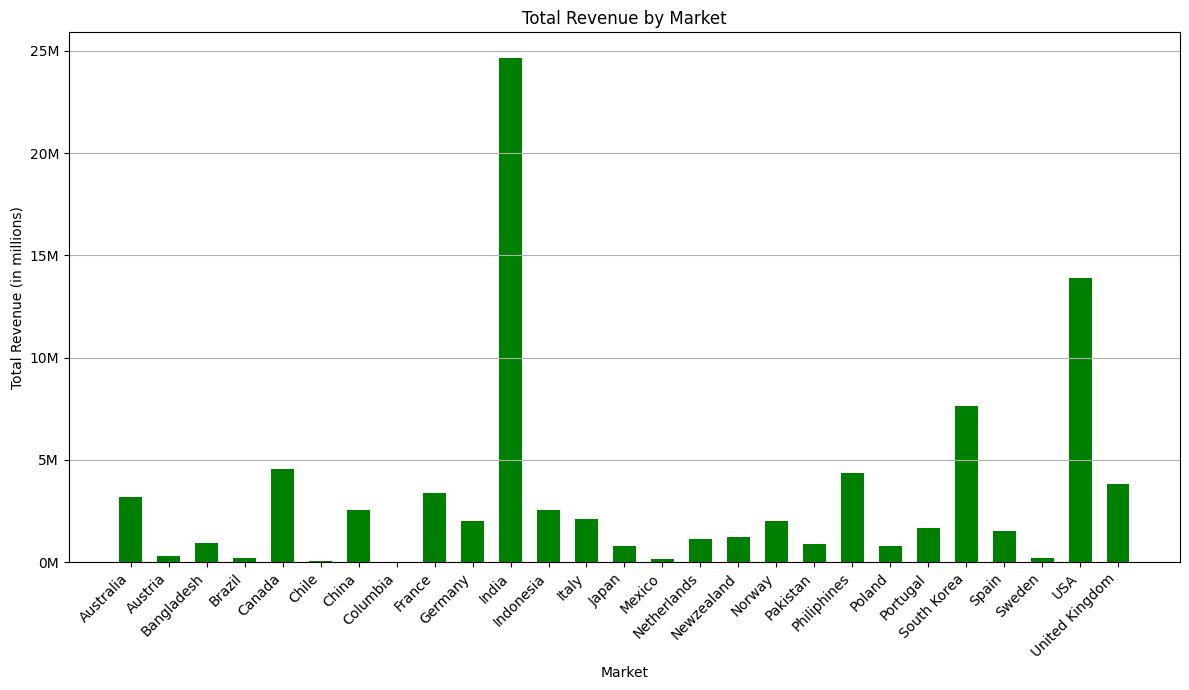

In [345]:
# plot total revenue data by market
markets = aggregated_by_market['market']
revenue = aggregated_by_market['total_revenue']

# set up the bar width and positions
index = np.arange(len(markets))

# plot the bars
fig, ax = plt.subplots(figsize=(12, 7))

# revenue bars
bar1 = ax.bar(index, revenue, color='green', width=0.6)

# labels and title
ax.set_xlabel('Market')
ax.set_ylabel('Total Revenue (in millions)')
ax.set_title('Total Revenue by Market')
ax.set_xticks(index)
ax.set_xticklabels(markets, rotation=45, ha='right')

# format y-axis to show values in millions
formatter = plt.FuncFormatter(lambda x, pos: f'{x*1e-6:,.0f}M')
ax.yaxis.set_major_formatter(formatter)

# add a grid for better readability
ax.grid(True, axis='y')

plt.tight_layout()
plt.show()

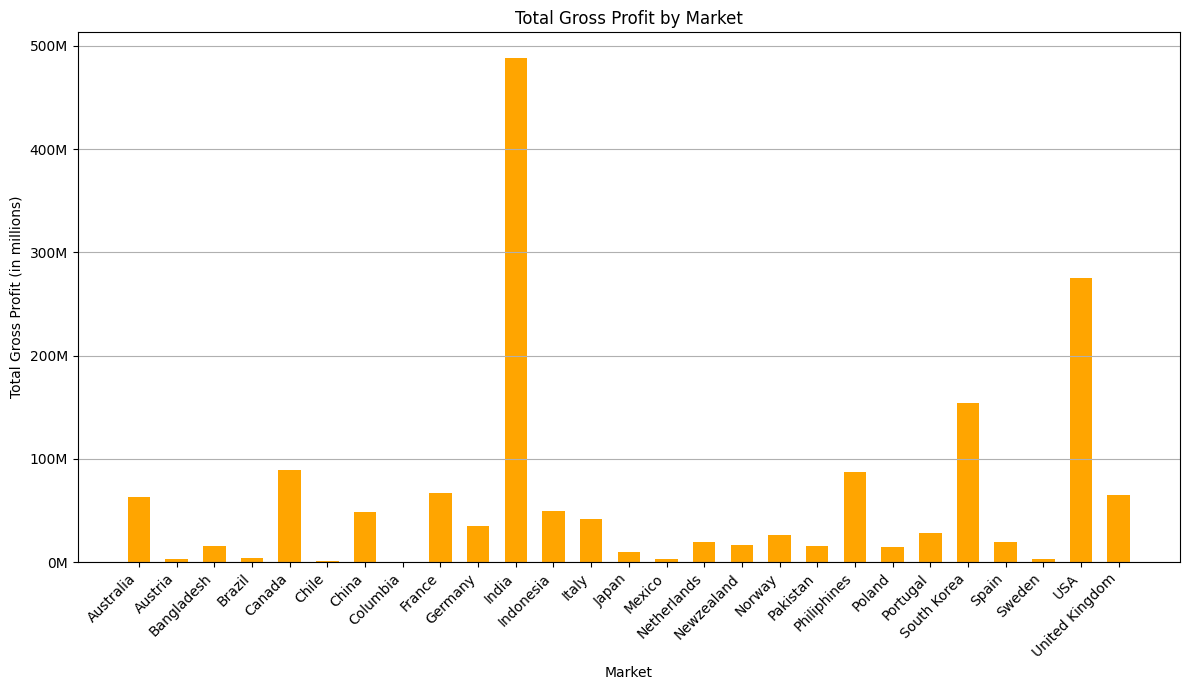

In [346]:
# plot total gross profit by market
markets = aggregated_by_market['market']
gross_profit = aggregated_by_market['total_gross_profit']

# set up the bar width and positions
index = np.arange(len(markets))

# plot the bars
fig, ax = plt.subplots(figsize=(12, 7))

# Gross Profit bars
bar1 = ax.bar(index, gross_profit, color='orange', width=0.6)

# labels and title
ax.set_xlabel('Market')
ax.set_ylabel('Total Gross Profit (in millions)')
ax.set_title('Total Gross Profit by Market')
ax.set_xticks(index)
ax.set_xticklabels(markets, rotation=45, ha='right')

# format y-axis to show values in millions
formatter = plt.FuncFormatter(lambda x, pos: f'{x*1e-6:,.0f}M')
ax.yaxis.set_major_formatter(formatter)

# add a grid for better readability
ax.grid(True, axis='y')

plt.tight_layout()
plt.show()

#### Aggregate the data by Platform.

In [389]:
# query to aggregate data by platform
query_platform = """
WITH gross_profit_calculation AS (
    SELECT 
        dc.platform,
        fsm.product_code,
        fsm.customer_code,
        fsm.sold_quantity,
        fgp.gross_price,
        fmc.manufacturing_cost,
        (fgp.gross_price - fmc.manufacturing_cost) AS gross_profit_per_unit,
        (fsm.sold_quantity * (fgp.gross_price - fmc.manufacturing_cost)) AS gross_profit
    FROM 
        fact_sales_monthly fsm
    INNER JOIN 
        fact_gross_price fgp ON fsm.product_code = fgp.product_code AND fsm.fiscal_year = fgp.fiscal_year
    INNER JOIN 
        fact_manufacturing_cost fmc ON fsm.product_code = fmc.product_code AND fsm.fiscal_year = fmc.cost_year
    INNER JOIN 
        dim_customer dc ON fsm.customer_code = dc.customer_code
),
total_revenue AS (
    SELECT 
        dc.platform,
        SUM(fsm.sold_quantity * fgp.gross_price) AS total_revenue
    FROM 
        fact_sales_monthly fsm
    JOIN 
        fact_gross_price fgp ON fsm.product_code = fgp.product_code AND fsm.fiscal_year = fgp.fiscal_year
    JOIN 
        dim_customer dc ON fsm.customer_code = dc.customer_code
    GROUP BY 
        dc.platform
),
total_sales_volume AS (
    SELECT 
        dc.platform,
        SUM(fsm.sold_quantity) AS total_sales_volume
    FROM 
        fact_sales_monthly fsm
    JOIN 
        dim_customer dc ON fsm.customer_code = dc.customer_code
    GROUP BY 
        dc.platform
),
cost_per_unit_calculation AS (
    SELECT
        dc.platform,
        AVG(fmc.manufacturing_cost) AS cost_per_unit
    FROM
        fact_sales_monthly fsm
    INNER JOIN
        fact_manufacturing_cost fmc ON fsm.product_code = fmc.product_code AND fsm.fiscal_year = fmc.cost_year
    INNER JOIN 
        dim_customer dc ON fsm.customer_code = dc.customer_code
    GROUP BY
        dc.platform
),
aggregated_data AS (
    SELECT 
        gp.platform,
        SUM(gp.gross_profit) AS total_gross_profit,
        (SUM(gp.gross_profit) / SUM(fsm.sold_quantity * fgp.gross_price)) * 100 AS profit_margin
    FROM 
        gross_profit_calculation gp
    INNER JOIN 
        fact_sales_monthly fsm ON gp.product_code = fsm.product_code AND gp.customer_code = fsm.customer_code
    INNER JOIN 
        fact_gross_price fgp ON gp.product_code = fgp.product_code AND fsm.fiscal_year = fgp.fiscal_year
    GROUP BY 
        gp.platform
)
SELECT 
    ad.platform,
    ad.total_gross_profit,
    ad.profit_margin,
    tr.total_revenue,
    tsv.total_sales_volume,
    cp.cost_per_unit
FROM 
    aggregated_data ad
INNER JOIN 
    total_revenue tr ON ad.platform = tr.platform
INNER JOIN 
    total_sales_volume tsv ON ad.platform = tsv.platform
INNER JOIN
    cost_per_unit_calculation cp ON ad.platform = cp.platform
ORDER BY 
    ad.platform;
"""
aggregated_by_platform = pd.read_sql_query(query_platform, con)
aggregated_by_platform.to_sql('aggregated_by_platform', con, if_exists='replace', index=False)
aggregated_by_platform

,platform,total_gross_profit,profit_margin,total_revenue,total_sales_volume,cost_per_unit
0,Brick & Mortar,1.155682e+09,70.309333,6.096251e+07,2657627,6.190947
1,E-Commerce,4.874514e+08,70.311965,2.559340e+07,1125308,6.177413


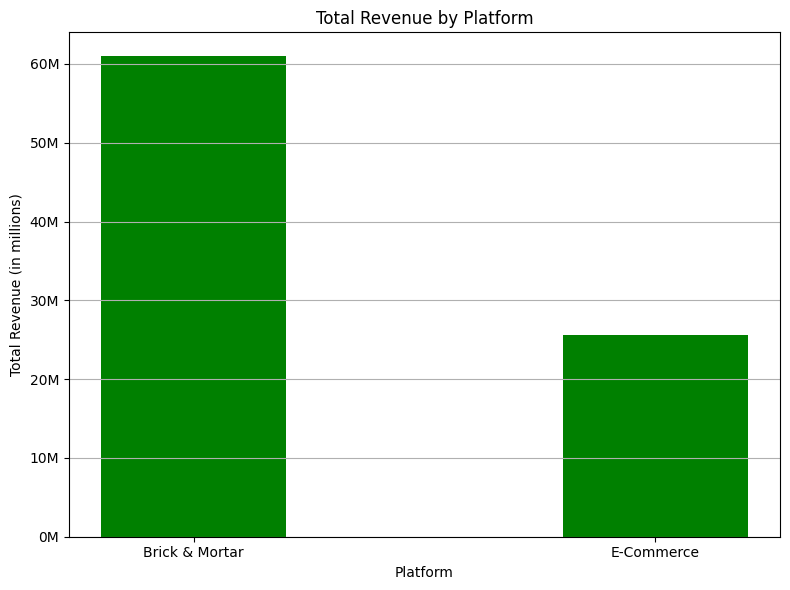

In [390]:
# plot total revenue by platform
platforms = aggregated_by_platform['platform']
revenue = aggregated_by_platform['total_revenue']

# set up the bar width and positions
index = np.arange(len(platforms))

# plot the bars
fig, ax = plt.subplots(figsize=(8, 6))

# Revenue bars
bar1 = ax.bar(index, revenue, color='green', width=0.4)

# labels and title
ax.set_xlabel('Platform')
ax.set_ylabel('Total Revenue (in millions)')
ax.set_title('Total Revenue by Platform')
ax.set_xticks(index)
ax.set_xticklabels(platforms)

# format y-axis to show values in millions
formatter = plt.FuncFormatter(lambda x, pos: f'{x*1e-6:,.0f}M')
ax.yaxis.set_major_formatter(formatter)

# add a grid for better readability
ax.grid(True, axis='y')

plt.tight_layout()
plt.show()

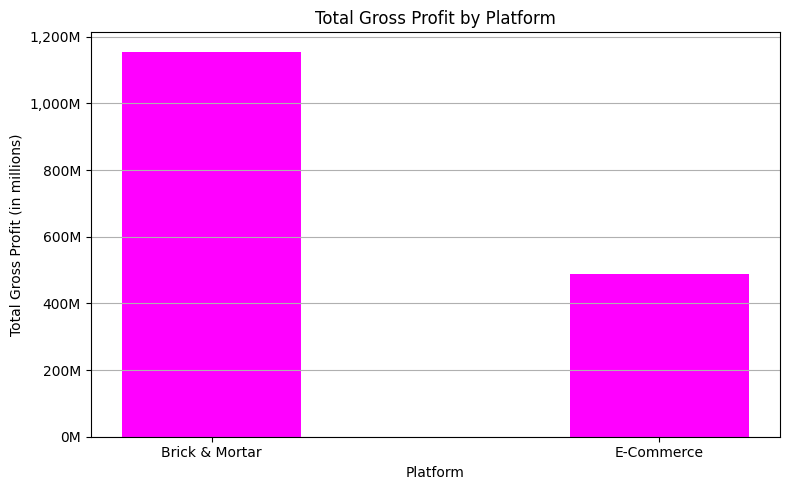

In [391]:
# plot total gross profit by platform
platforms = aggregated_by_platform['platform']
gross_profit = aggregated_by_platform['total_gross_profit']

# set up the bar width and positions
index = np.arange(len(platforms))

# plot the bars
fig, ax = plt.subplots(figsize=(8, 5))

# Gross Profit bars
bar1 = ax.bar(index, gross_profit, color='magenta', width=0.4)

# labels and title
ax.set_xlabel('Platform')
ax.set_ylabel('Total Gross Profit (in millions)')
ax.set_title('Total Gross Profit by Platform')
ax.set_xticks(index)
ax.set_xticklabels(platforms, rotation=0, ha='center')

# format y-axis to show values in millions
formatter = plt.FuncFormatter(lambda x, pos: f'{x*1e-6:,.0f}M')
ax.yaxis.set_major_formatter(formatter)

# add a grid for better readability
ax.grid(True, axis='y')

plt.tight_layout()
plt.show()

#### Aggregate the data by Channel.

In [427]:
# query to aggregate data by channel
query_channel = """
WITH gross_profit_calculation AS (
    SELECT 
        dc.channel,
        fsm.product_code,
        fsm.customer_code,
        fsm.sold_quantity,
        fgp.gross_price,
        fmc.manufacturing_cost,
        (fgp.gross_price - fmc.manufacturing_cost) AS gross_profit_per_unit,
        (fsm.sold_quantity * (fgp.gross_price - fmc.manufacturing_cost)) AS gross_profit
    FROM 
        fact_sales_monthly fsm
    INNER JOIN 
        fact_gross_price fgp ON fsm.product_code = fgp.product_code AND fsm.fiscal_year = fgp.fiscal_year
    INNER JOIN 
        fact_manufacturing_cost fmc ON fsm.product_code = fmc.product_code AND fsm.fiscal_year = fmc.cost_year
    INNER JOIN 
        dim_customer dc ON fsm.customer_code = dc.customer_code
),
total_revenue AS (
    SELECT 
        dc.channel,
        SUM(fsm.sold_quantity * fgp.gross_price) AS total_revenue
    FROM 
        fact_sales_monthly fsm
    JOIN 
        fact_gross_price fgp ON fsm.product_code = fgp.product_code AND fsm.fiscal_year = fgp.fiscal_year
    JOIN 
        dim_customer dc ON fsm.customer_code = dc.customer_code
    GROUP BY 
        dc.channel
),
total_sales_volume AS (
    SELECT 
        dc.channel,
        SUM(fsm.sold_quantity) AS total_sales_volume
    FROM 
        fact_sales_monthly fsm
    JOIN 
        dim_customer dc ON fsm.customer_code = dc.customer_code
    GROUP BY 
        dc.channel
),
cost_per_unit_calculation AS (
    SELECT
        dc.channel,
        AVG(fmc.manufacturing_cost) AS cost_per_unit
    FROM
        fact_sales_monthly fsm
    INNER JOIN
        fact_manufacturing_cost fmc ON fsm.product_code = fmc.product_code AND fsm.fiscal_year = fmc.cost_year
    INNER JOIN 
        dim_customer dc ON fsm.customer_code = dc.customer_code
    GROUP BY
        dc.channel
),
aggregated_data AS (
    SELECT 
        gp.channel,
        SUM(gp.gross_profit) AS total_gross_profit,
        (SUM(gp.gross_profit) / SUM(fsm.sold_quantity * fgp.gross_price)) * 100 AS profit_margin
    FROM 
        gross_profit_calculation gp
    INNER JOIN 
        fact_sales_monthly fsm ON gp.product_code = fsm.product_code AND gp.customer_code = fsm.customer_code
    INNER JOIN 
        fact_gross_price fgp ON gp.product_code = fgp.product_code AND fsm.fiscal_year = fgp.fiscal_year
    GROUP BY 
        gp.channel
)
SELECT 
    ad.channel,
    ad.total_gross_profit,
    ad.profit_margin,
    tr.total_revenue,
    tsv.total_sales_volume,
    cp.cost_per_unit
FROM 
    aggregated_data ad
INNER JOIN 
    total_revenue tr ON ad.channel = tr.channel
INNER JOIN 
    total_sales_volume tsv ON ad.channel = tsv.channel
INNER JOIN
    cost_per_unit_calculation cp ON ad.channel = cp.channel
ORDER BY 
    ad.channel;
"""
aggregated_by_channel = pd.read_sql_query(query_channel, con)
aggregated_by_channel.to_sql('aggregated_by_channel', con, if_exists='replace', index=False)
aggregated_by_channel

,channel,total_gross_profit,profit_margin,total_revenue,total_sales_volume,cost_per_unit
0,Direct,2.614959e+08,70.303234,1.379113e+07,604891,6.167320
1,Distributor,2.006501e+08,70.318711,1.006215e+07,443286,6.040547
2,Retailer,1.180987e+09,70.310177,6.270263e+07,2734758,6.197497


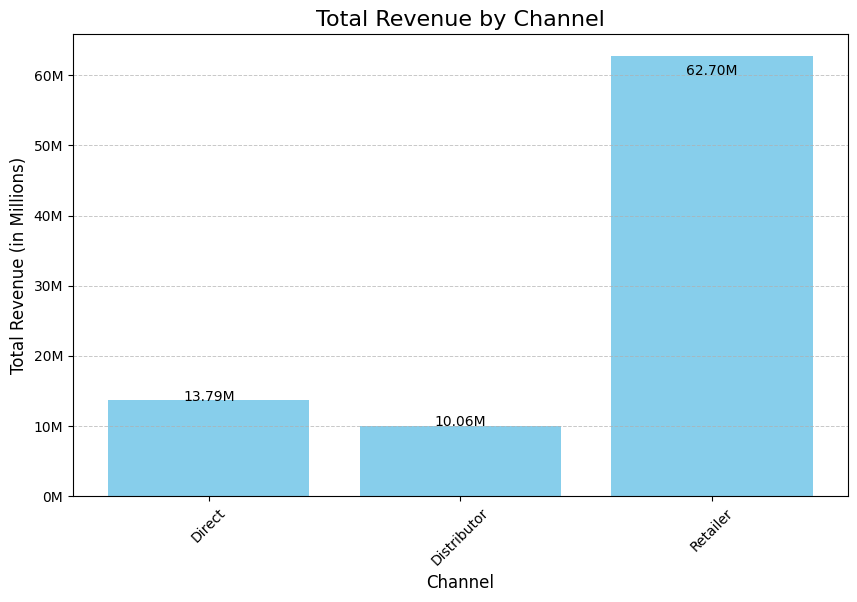

In [428]:
# plot total revenue by channel
# extract the 'channel' and 'total_revenue' columns
channels = aggregated_by_channel['channel'].values
total_revenue = aggregated_by_channel['total_revenue'].values

# set the size of the plot
fig, ax = plt.subplots(figsize=(10, 6))

# create the bar plot
bars = ax.bar(channels, total_revenue, color='skyblue')

# add titles and labels
ax.set_title('Total Revenue by Channel', fontsize=16)
ax.set_xlabel('Channel', fontsize=12)
ax.set_ylabel('Total Revenue (in Millions)', fontsize=12)

# rotate x labels for better readability
plt.xticks(rotation=45)

# Format y-axis to show values in millions
formatter = plt.FuncFormatter(lambda x, pos: f'{x*1e-6:,.0f}M')
ax.yaxis.set_major_formatter(formatter)

# add grid lines for better readability
ax.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval - 0.05*yval, f'{yval*1e-6:,.2f}M', 
            ha='center', va='bottom', color='black', fontsize=10)

plt.show()

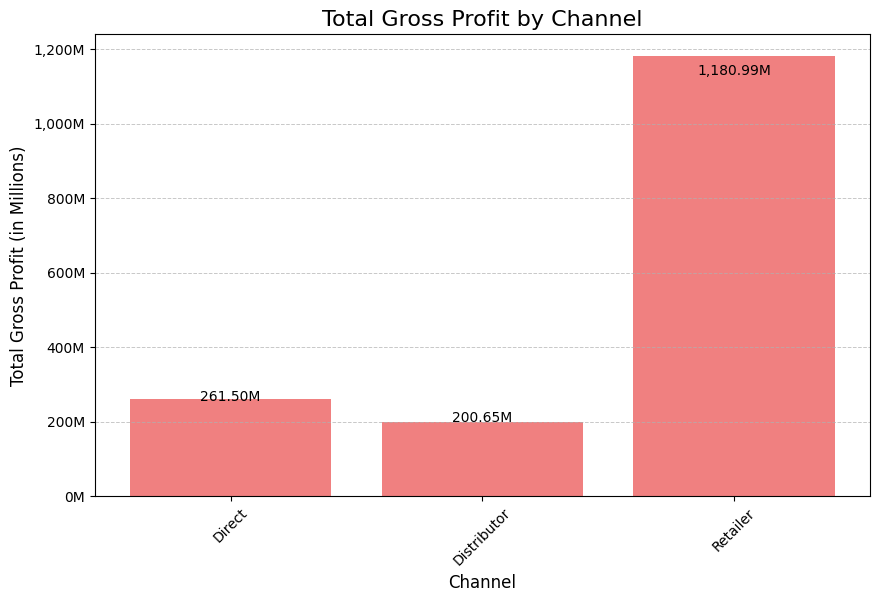

In [429]:
# plot total gross profit by channel
# extract the 'channel' and 'total_gross_profit' columns
channels = aggregated_by_channel['channel'].values
total_gross_profit = aggregated_by_channel['total_gross_profit'].values

# set the size of the plot
fig, ax = plt.subplots(figsize=(10, 6))

# create the bar plot
bars = ax.bar(channels, total_gross_profit, color='lightcoral')

# add titles and labels
ax.set_title('Total Gross Profit by Channel', fontsize=16)
ax.set_xlabel('Channel', fontsize=12)
ax.set_ylabel('Total Gross Profit (in Millions)', fontsize=12)

# rotate x labels for better readability
plt.xticks(rotation=45)

# format y-axis to show values in millions
formatter = plt.FuncFormatter(lambda x, pos: f'{x*1e-6:,.0f}M')
ax.yaxis.set_major_formatter(formatter)

# add grid lines for better readability
ax.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

# add value labels inside the upper part of each bar
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval - 0.05*yval, f'{yval*1e-6:,.2f}M', 
            ha='center', va='bottom', color='black', fontsize=10)

plt.show()

#### Aggregate the data by Customer.

In [513]:
# query to aggregate data by customer
query_customer = """
WITH gross_profit_calculation AS (
    SELECT 
        fsm.customer_code,
        fsm.product_code,
        fsm.sold_quantity,
        fsm.fiscal_year,
        fgp.gross_price,
        fmc.manufacturing_cost,
        dc.market,
        (fgp.gross_price - fmc.manufacturing_cost) AS gross_profit_per_unit,
        (fsm.sold_quantity * (fgp.gross_price - fmc.manufacturing_cost)) AS gross_profit,
        (fsm.sold_quantity * fgp.gross_price) AS revenue
    FROM 
        fact_sales_monthly fsm
    INNER JOIN 
        fact_gross_price fgp ON fsm.product_code = fgp.product_code AND fsm.fiscal_year = fgp.fiscal_year
    INNER JOIN 
        fact_manufacturing_cost fmc ON fsm.product_code = fmc.product_code AND fsm.fiscal_year = fmc.cost_year
    INNER JOIN 
        dim_customer dc ON fsm.customer_code = dc.customer_code
),
discounts_customer AS (
    SELECT 
        fpd.customer_code,
        SUM((gp.gross_profit * (fpd.pre_invoice_discount_pct / 100))) AS total_discount
    FROM 
        gross_profit_calculation gp
    LEFT JOIN 
        fact_pre_discount fpd ON gp.customer_code = fpd.customer_code AND gp.fiscal_year = fpd.fiscal_year
    GROUP BY 
        fpd.customer_code
),
frequency_purchase_customer AS (
    SELECT 
        fsm.customer_code,
        COUNT(DISTINCT fsm.date) AS purchase_frequency
    FROM 
        fact_sales_monthly fsm
    GROUP BY 
        fsm.customer_code
),
cltv_customer AS (
    SELECT 
        gp.customer_code,
        SUM(gp.gross_profit) AS customer_lifetime_value
    FROM 
        gross_profit_calculation gp
    GROUP BY 
        gp.customer_code
),
market_segment_contribution AS (
    SELECT 
        gp.market,
        gp.customer_code,
        SUM(gp.revenue) AS market_contribution
    FROM 
        gross_profit_calculation gp
    GROUP BY 
        gp.market, gp.customer_code
),
churn_customer_segment AS (
    SELECT 
        fsm.customer_code,
        CASE 
            WHEN MAX(fsm.fiscal_year) < (SELECT MAX(fiscal_year) FROM fact_sales_monthly) THEN 1
            ELSE 0
        END AS churn_status
    FROM 
        fact_sales_monthly fsm
    GROUP BY 
        fsm.customer_code
)
SELECT 
    gp.customer_code,
    SUM(gp.revenue) AS revenue_per_customer,
    SUM(gp.gross_profit) AS gross_profit_per_customer,
    SUM(gp.sold_quantity) AS total_sales_volume_per_customer,
    cltv.customer_lifetime_value,
    dc.total_discount AS discounts_customer,
    fp.purchase_frequency AS frequency_purchase_customer,
    churn.churn_status AS churn_customer_segment,
    ms.market_contribution
FROM 
    gross_profit_calculation gp
LEFT JOIN 
    discounts_customer dc ON gp.customer_code = dc.customer_code
LEFT JOIN 
    frequency_purchase_customer fp ON gp.customer_code = fp.customer_code
LEFT JOIN 
    cltv_customer cltv ON gp.customer_code = cltv.customer_code
LEFT JOIN 
    churn_customer_segment churn ON gp.customer_code = churn.customer_code
LEFT JOIN 
    market_segment_contribution ms ON gp.customer_code = ms.customer_code
GROUP BY 
    gp.customer_code, cltv.customer_lifetime_value, dc.total_discount, fp.purchase_frequency, churn.churn_status, ms.market_contribution
ORDER BY 
    gp.customer_code;
"""
aggregated_customer = pd.read_sql_query(query_customer, con)
aggregated_customer.to_sql('aggregated_customer', con, if_exists='replace', index=False)
aggregated_customer.head(10)

,customer_code,revenue_per_customer,gross_profit_per_customer,total_sales_volume_per_customer,customer_lifetime_value,discounts_customer,frequency_purchase_customer,churn_customer_segment,market_contribution
0,70002017,1.205805e+06,847238.4964,53113,847238.4964,741.131098,39,0,1.205805e+06
1,70002018,1.386284e+06,974635.0415,61138,974635.0415,2489.502111,39,0,1.386284e+06
2,70003181,5.934382e+05,417671.6954,25998,417671.6954,315.693134,39,0,5.934382e+05
3,70003182,6.302344e+05,443607.1532,27323,443607.1532,915.161929,39,0,6.302344e+05
4,70004069,7.092248e+04,49872.5799,2993,49872.5799,45.477811,21,0,7.092248e+04
5,70004070,7.838817e+04,55082.6040,3362,55082.6040,126.574376,21,0,7.838817e+04
6,70005163,1.888071e+05,132728.2086,8323,132728.2086,354.985134,30,0,1.888071e+05
7,70006157,3.438517e+05,241837.2469,15258,241837.2469,176.758118,39,0,3.438517e+05
8,70006158,3.816029e+05,268303.5315,17015,268303.5315,600.418901,39,0,3.816029e+05
9,70007198,6.543170e+05,459989.9115,29101,459989.9115,370.765099,39,0,6.543170e+05


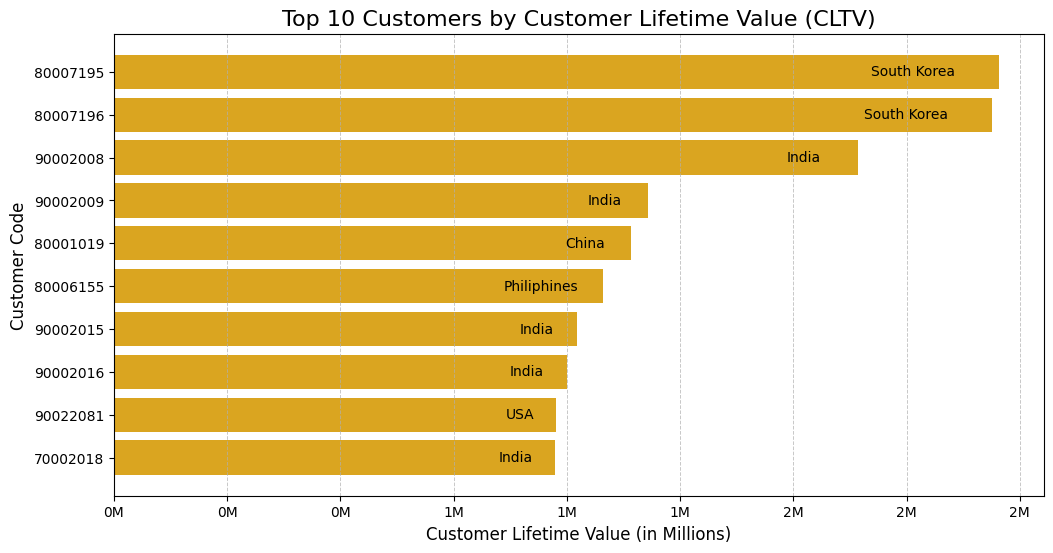

In [514]:
# plot top 10 customers by customer lifetime value
# sort by customer lifetime value to highlight top customers
top_customers = aggregated_customer.sort_values(by='customer_lifetime_value', ascending=False).head(10)

# merge with dim_customer to get market information
top_customers = pd.merge(top_customers, dim_customer[['customer_code', 'market']], on='customer_code', how='left')

# set the size of the plot
fig, ax = plt.subplots(figsize=(12, 6))

# create the bar plot
bars = ax.barh(top_customers['customer_code'].astype(str), top_customers['customer_lifetime_value'], color='goldenrod')

# add titles and labels
ax.set_title('Top 10 Customers by Customer Lifetime Value (CLTV)', fontsize=16)
ax.set_xlabel('Customer Lifetime Value (in Millions)', fontsize=12)
ax.set_ylabel('Customer Code', fontsize=12)

# invert the y-axis to have the highest CLTV at the top
plt.gca().invert_yaxis()

# format the x-axis to show values in millions
formatter = plt.FuncFormatter(lambda x, pos: f'{x*1e-6:,.0f}M')
ax.xaxis.set_major_formatter(formatter)

# add grid lines for better readability
ax.grid(True, which='both', axis='x', linestyle='--', linewidth=0.7, alpha=0.7)

# add market labels inside the bars
for bar, market in zip(bars, top_customers['market']):
    width = bar.get_width()
    ax.text(width - 0.05*width, bar.get_y() + bar.get_height()/2, market, 
            ha='right', va='center', color='black', fontsize=10)

plt.show()

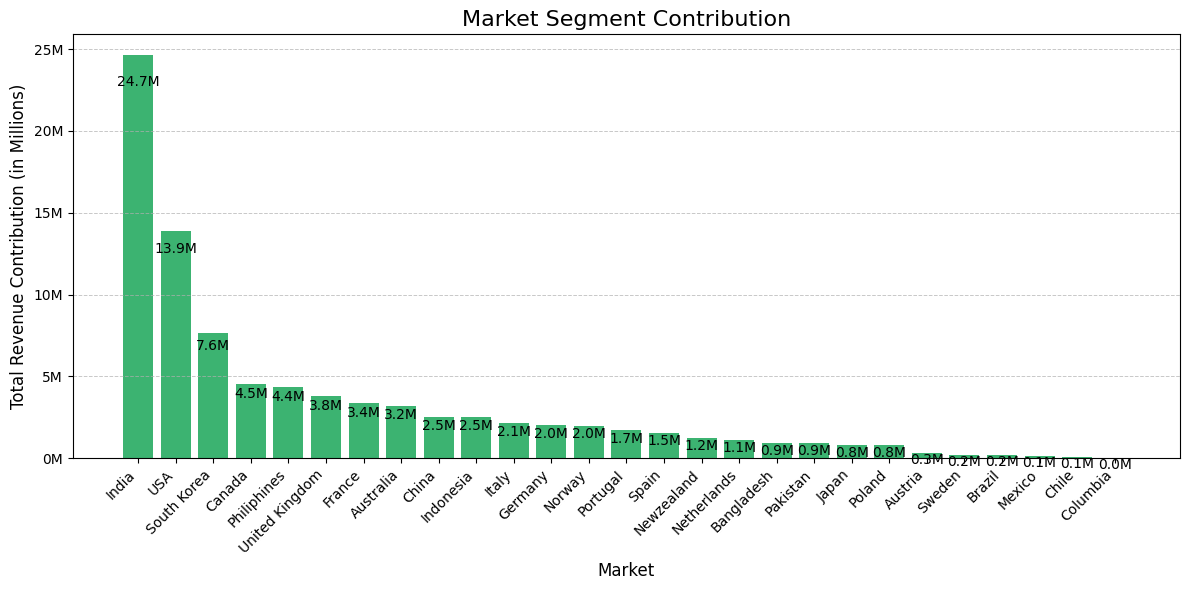

In [515]:
# plot market segment contribution
# merge market data with aggregated_customer
aggregated_customer = pd.merge(aggregated_customer, dim_customer[['customer_code', 'market']], on='customer_code', how='left')

# group by market to sum up the contributions
market_contribution = aggregated_customer.groupby('market')['market_contribution'].sum().sort_values(ascending=False)

# set the size of the plot
fig, ax = plt.subplots(figsize=(12, 6))

# create the bar plot
bars = ax.bar(market_contribution.index, market_contribution.values, color='mediumseagreen')

# add titles and labels
ax.set_title('Market Segment Contribution', fontsize=16)
ax.set_xlabel('Market', fontsize=12)
ax.set_ylabel('Total Revenue Contribution (in Millions)', fontsize=12)

# format the y-axis to show values in millions
formatter = plt.FuncFormatter(lambda x, pos: f'{x*1e-6:,.0f}M')
ax.yaxis.set_major_formatter(formatter)

# add grid lines for better readability
ax.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

# add value labels inside the bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height - 0.05*height, f'{height*1e-6:,.1f}M', 
            ha='center', va='top', color='black', fontsize=10)

# rotate x-axis labels if necessary
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

#### Aggregate the data by Category.

In [516]:
unique_categories = """SELECT DISTINCT category
FROM dim_product
ORDER BY category;
"""
categories = pd.read_sql_query(unique_categories, con)
categories

,category
0,Batteries
1,Business Laptop
2,External Solid State Drives
3,Gaming Laptop
4,Graphic Card
5,Internal HDD
6,Keyboard
7,MotherBoard
8,Mouse
9,Personal Desktop


In [517]:
# rename the cost_year column in fact_manufacturing_cost table as fiscal_year
cost_year_query = """
SELECT 
    product_code,
    cost_year AS fiscal_year,
    manufacturing_cost
FROM 
    fact_manufacturing_cost;
"""

fact_manufacturing_renamed = pd.read_sql_query(cost_year_query, con)
fact_manufacturing_renamed.head()

,product_code,fiscal_year,manufacturing_cost
0,A0118150101,2018,4.6190
1,A0118150101,2019,4.2033
2,A0118150101,2020,5.0207
3,A0118150101,2021,5.5172
4,A0118150102,2018,5.6036


In [518]:
# compute the revenue, gross profit, profit margin, total sales volume, and cost per unit of each product_code
product_query = """
WITH product_sales AS (
    SELECT
        fsm.product_code,
        fsm.fiscal_year,
        SUM(fsm.sold_quantity) AS total_sold_quantity
    FROM
        fact_sales_monthly fsm
    GROUP BY
        fsm.product_code, fsm.fiscal_year
),
product_revenue AS (
    SELECT
        ps.product_code,
        ps.fiscal_year,
        SUM(ps.total_sold_quantity * fgp.gross_price) AS revenue
    FROM
        product_sales ps
    LEFT JOIN
        fact_gross_price fgp 
        ON ps.product_code = fgp.product_code 
        AND ps.fiscal_year = fgp.fiscal_year
    GROUP BY
        ps.product_code, ps.fiscal_year
),
product_cost AS (
    SELECT
        ps.product_code,
        ps.fiscal_year,
        SUM(ps.total_sold_quantity * fmr.manufacturing_cost) AS total_cost
    FROM
        product_sales ps
    LEFT JOIN
        fact_manufacturing_renamed fmr 
        ON ps.product_code = fmr.product_code 
        AND ps.fiscal_year = fmr.fiscal_year
    GROUP BY
        ps.product_code, ps.fiscal_year
),
gross_profit_calculation AS (
    SELECT
        pr.product_code,
        pr.fiscal_year,
        pr.revenue,
        (pr.revenue - COALESCE(pc.total_cost, 0)) AS gross_profit,
        CASE 
            WHEN pr.revenue > 0 THEN ((pr.revenue - COALESCE(pc.total_cost, 0)) / pr.revenue) * 100
            ELSE 0
        END AS profit_margin,
        COALESCE(ps.total_sold_quantity, 0) AS total_sales_volume,
        CASE 
            WHEN COALESCE(ps.total_sold_quantity, 0) > 0 THEN (COALESCE(pc.total_cost, 0) / COALESCE(ps.total_sold_quantity, 0))
            ELSE 0
        END AS cost_per_unit
    FROM
        product_revenue pr
    LEFT JOIN
        product_cost pc 
        ON pr.product_code = pc.product_code 
        AND pr.fiscal_year = pc.fiscal_year
    LEFT JOIN
        product_sales ps
        ON pr.product_code = ps.product_code
        AND pr.fiscal_year = ps.fiscal_year
)
SELECT
    gpc.product_code,
    gpc.fiscal_year,
    gpc.revenue,
    gpc.gross_profit,
    gpc.profit_margin,
    gpc.total_sales_volume,
    gpc.cost_per_unit
FROM
    gross_profit_calculation gpc
ORDER BY
    gpc.product_code, gpc.fiscal_year;
"""

metrics_by_product = pd.read_sql_query(product_query, con)
metrics_by_product.to_sql('metrics_by_product', con, if_exists='replace', index=False)
metrics_by_product.head()

,product_code,fiscal_year,revenue,gross_profit,profit_margin,total_sales_volume,cost_per_unit
0,A0118150101,2018,2.873360e+05,2.011270e+05,69.997142,18664,4.6190
1,A0118150101,2019,6.007862e+05,4.258953e+05,70.889661,41608,4.2033
2,A0118150101,2020,1.016645e+06,7.021937e+05,69.069694,62631,5.0207
3,A0118150101,2021,1.906473e+06,1.354538e+06,71.049414,100039,5.5172
4,A0118150102,2018,3.516544e+05,2.510530e+05,71.391959,17953,5.6036


In [519]:
metrics_by_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_code        49 non-null     object 
 1   fiscal_year         49 non-null     int64  
 2   revenue             49 non-null     float64
 3   gross_profit        49 non-null     float64
 4   profit_margin       49 non-null     float64
 5   total_sales_volume  49 non-null     int64  
 6   cost_per_unit       49 non-null     float64
dtypes: float64(4), int64(2), object(1)
memory usage: 2.8+ KB


#### This output reveals inconsistency on the aggregations and on the existence of combined values for all the tables used. I will research this deeper.

In [520]:
# query for unique combinations of product_code and fiscal_year in fact_sales_monthly
query_sales = """
SELECT DISTINCT product_code, fiscal_year
FROM fact_sales_monthly;
"""
sales_combinations = pd.read_sql_query(query_sales, con)
sales_combinations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_code  49 non-null     object
 1   fiscal_year   49 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 916.0+ bytes


In [521]:
# query for unique combinations of product_code and fiscal_year in fact_gross_price
query_gross_price = """
SELECT DISTINCT product_code, fiscal_year
FROM fact_gross_price;
"""
gross_price_combinations = pd.read_sql_query(query_gross_price, con)
gross_price_combinations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1182 entries, 0 to 1181
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_code  1182 non-null   object
 1   fiscal_year   1182 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 18.6+ KB


In [522]:
# query for unique combinations of product_code and fiscal_year in fact_manufacturing_renamed
query_manufacturing = """
SELECT DISTINCT product_code, fiscal_year
FROM fact_manufacturing_renamed;
"""
manufacturing_combinations = pd.read_sql_query(query_manufacturing, con)
manufacturing_combinations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1182 entries, 0 to 1181
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_code  1182 non-null   object
 1   fiscal_year   1182 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 18.6+ KB


In [523]:
# to identify records from the fact_sales_monthly table that don't have a corresponding entry in the fact_gross_price table based on matching product_code and fiscal_year. 
query_missing_gross_price = """
SELECT fs.product_code, fs.fiscal_year
FROM fact_sales_monthly fs
LEFT JOIN fact_gross_price fgp ON fs.product_code = fgp.product_code AND fs.fiscal_year = fgp.fiscal_year
WHERE fgp.product_code IS NULL;
"""
missing_in_gross_price = pd.read_sql_query(query_missing_gross_price, con)
missing_in_gross_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_code  0 non-null      object
 1   fiscal_year   0 non-null      object
dtypes: object(2)
memory usage: 132.0+ bytes


#### There are no records in fact_sales_monthly that are missing from fact_gross_price for the matched product_code and fiscal_year.

In [524]:
# get all combinations of product_code and fiscal_year from all tables
query_all_combinations = """
WITH all_combinations AS (
    SELECT DISTINCT
        fsm.product_code,
        fsm.fiscal_year
    FROM fact_sales_monthly fsm
    UNION
    SELECT DISTINCT
        fgp.product_code,
        fgp.fiscal_year
    FROM fact_gross_price fgp
    UNION
    SELECT DISTINCT
        fmr.product_code,
        fmr.fiscal_year
    FROM fact_manufacturing_renamed fmr
),

product_sales AS (
    SELECT
        product_code,
        fiscal_year,
        COALESCE(SUM(sold_quantity), 0) AS total_sold_quantity
    FROM fact_sales_monthly
    GROUP BY product_code, fiscal_year
),

product_revenue AS (
    SELECT
        ps.product_code,
        ps.fiscal_year,
        COALESCE(SUM(ps.total_sold_quantity * fgp.gross_price), 0) AS revenue
    FROM product_sales ps
    LEFT JOIN fact_gross_price fgp ON ps.product_code = fgp.product_code AND ps.fiscal_year = fgp.fiscal_year
    GROUP BY ps.product_code, ps.fiscal_year
),

product_cost AS (
    SELECT
        ps.product_code,
        ps.fiscal_year,
        COALESCE(SUM(ps.total_sold_quantity * fmr.manufacturing_cost), 0) AS total_cost
    FROM product_sales ps
    LEFT JOIN fact_manufacturing_renamed fmr ON ps.product_code = fmr.product_code AND ps.fiscal_year = fmr.fiscal_year
    GROUP BY ps.product_code, ps.fiscal_year
),

gross_profit_calculation AS (
    SELECT
        ac.product_code,
        ac.fiscal_year,
        COALESCE(pr.revenue, 0) AS revenue,
        COALESCE(pr.revenue, 0) - COALESCE(pc.total_cost, 0) AS gross_profit,
        CASE 
            WHEN COALESCE(pr.revenue, 0) > 0 THEN ((COALESCE(pr.revenue, 0) - COALESCE(pc.total_cost, 0)) / COALESCE(pr.revenue, 0)) * 100
            ELSE 0
        END AS profit_margin,
        COALESCE(ps.total_sold_quantity, 0) AS total_sales_volume,
        CASE 
            WHEN COALESCE(ps.total_sold_quantity, 0) > 0 THEN (COALESCE(pc.total_cost, 0) / COALESCE(ps.total_sold_quantity, 0))
            ELSE 0
        END AS cost_per_unit
    FROM all_combinations ac
    LEFT JOIN product_revenue pr ON ac.product_code = pr.product_code AND ac.fiscal_year = pr.fiscal_year
    LEFT JOIN product_cost pc ON ac.product_code = pc.product_code AND ac.fiscal_year = pc.fiscal_year
    LEFT JOIN product_sales ps ON ac.product_code = ps.product_code AND ac.fiscal_year = ps.fiscal_year
)

SELECT
    gpc.product_code,
    gpc.fiscal_year,
    gpc.revenue,
    gpc.gross_profit,
    gpc.profit_margin,
    gpc.total_sales_volume,
    gpc.cost_per_unit
FROM gross_profit_calculation gpc
ORDER BY gpc.product_code, gpc.fiscal_year;
"""

all_combinations_df = pd.read_sql_query(query_all_combinations, con)
all_combinations_df.to_sql('all_combinations_metrics', con, if_exists='replace', index=False)
all_combinations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1182 entries, 0 to 1181
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_code        1182 non-null   object 
 1   fiscal_year         1182 non-null   int64  
 2   revenue             1182 non-null   float64
 3   gross_profit        1182 non-null   float64
 4   profit_margin       1182 non-null   float64
 5   total_sales_volume  1182 non-null   int64  
 6   cost_per_unit       1182 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 64.8+ KB


In [525]:
all_combinations_df.head()

,product_code,fiscal_year,revenue,gross_profit,profit_margin,total_sales_volume,cost_per_unit
0,A0118150101,2018,2.873360e+05,2.011270e+05,69.997142,18664,4.6190
1,A0118150101,2019,6.007862e+05,4.258953e+05,70.889661,41608,4.2033
2,A0118150101,2020,1.016645e+06,7.021937e+05,69.069694,62631,5.0207
3,A0118150101,2021,1.906473e+06,1.354538e+06,71.049414,100039,5.5172
4,A0118150102,2018,3.516544e+05,2.510530e+05,71.391959,17953,5.6036


#### Now it is guaranteed that there is a complete dataset with all possible combinations, and it addresses the issue of missing values properly.

In [526]:
# join all_combinations_df with dim_product tables
query_joined = """
SELECT
    ac.product_code,
    ac.fiscal_year,
    ac.revenue,
    ac.gross_profit,
    ac.profit_margin,
    ac.total_sales_volume,
    ac.cost_per_unit,
    dp.division,
    dp.segment,
    dp.category,
    dp.product,
    dp.variant
FROM all_combinations_metrics ac
JOIN dim_product dp ON ac.product_code = dp.product_code
ORDER BY ac.product_code, ac.fiscal_year;
"""

joined_df = pd.read_sql_query(query_joined, con)
joined_df.to_sql('joined_metrics', con, if_exists='replace', index=False)
joined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1182 entries, 0 to 1181
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_code        1182 non-null   object 
 1   fiscal_year         1182 non-null   int64  
 2   revenue             1182 non-null   float64
 3   gross_profit        1182 non-null   float64
 4   profit_margin       1182 non-null   float64
 5   total_sales_volume  1182 non-null   int64  
 6   cost_per_unit       1182 non-null   float64
 7   division            1182 non-null   object 
 8   segment             1182 non-null   object 
 9   category            1182 non-null   object 
 10  product             1182 non-null   object 
 11  variant             1182 non-null   object 
dtypes: float64(4), int64(2), object(6)
memory usage: 110.9+ KB


#### I will group by category to see how many product_code values fall under each category and then calculate the metrics by category.

In [527]:
# group by 'category' and count distinct 'product_code' values in each category
grouped_by_category = joined_df.groupby('category')['product_code'].nunique().reset_index()

# rename columns to clarity
grouped_by_category.columns = ['category', 'num_product_codes']
grouped_by_category.to_sql('grouped_by_category', con, if_exists='replace', index=False)
grouped_by_category

,category,num_product_codes
0,Batteries,20
1,Business Laptop,44
2,External Solid State Drives,15
3,Gaming Laptop,40
4,Graphic Card,36
5,Internal HDD,10
6,Keyboard,48
7,MotherBoard,20
8,Mouse,48
9,Personal Desktop,16


In [528]:
# save the DataFrames as temporary tables
all_combinations_df.to_sql('all_combinations_df', con, if_exists='replace', index=False)
grouped_by_category.to_sql('grouped_by_category', con, if_exists='replace', index=False)

14

#### I will separate the metrics for each category by fiscal_year to compare and see their evolution through the time on the business.

In [529]:
# aggregate the metrics by category from all_combinations_df for 2018
aggregate_metrics_2018 = """
WITH category_aggregations AS (
    SELECT
        dp.category,
        -- Use CASE to handle NULL values and ensure the column is cast as INTEGER
        CASE
            WHEN ac.fiscal_year IS NOT NULL THEN CAST(ac.fiscal_year AS INTEGER)
            ELSE NULL
        END AS fiscal_year,
        SUM(ac.revenue) AS revenue,
        SUM(ac.gross_profit) AS gross_profit,
        AVG(ac.profit_margin) AS profit_margin,
        SUM(ac.total_sales_volume) AS total_sales_volume,
        AVG(ac.cost_per_unit) AS cost_per_unit
    FROM
        all_combinations_df ac
    JOIN
        dim_product dp ON ac.product_code = dp.product_code
    WHERE
        ac.fiscal_year = 2018
    GROUP BY
        dp.category, ac.fiscal_year
)
SELECT
    gbc.category,
    gbc.num_product_codes,
    ca.fiscal_year,
    ca.revenue,
    ca.gross_profit,
    ca.profit_margin,
    ca.total_sales_volume,
    ca.cost_per_unit
FROM
    grouped_by_category gbc
LEFT JOIN
    category_aggregations ca ON gbc.category = ca.category
ORDER BY
    gbc.category;
"""
aggregate_metrics_2018_df = pd.read_sql_query(aggregate_metrics_2018, con)
aggregate_metrics_2018_df.to_sql('aggregate_metrics_2018', con, if_exists='replace', index=False)
aggregate_metrics_2018_df

,category,num_product_codes,fiscal_year,revenue,gross_profit,profit_margin,total_sales_volume,cost_per_unit
0,Batteries,20,2018.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000
1,Business Laptop,44,2018.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000
2,External Solid State Drives,15,2018.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000
3,Gaming Laptop,40,2018.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000
4,Graphic Card,36,2018.0,1.579097e+06,1.112818e+06,56.338381,91366.0,4.076800
5,Internal HDD,10,2018.0,1.364914e+06,9.573028e+05,70.139074,73905.0,5.516325
6,Keyboard,48,2018.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000
7,MotherBoard,20,2018.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000
8,Mouse,48,2018.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000
9,Personal Desktop,16,2018.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000


In [530]:
print(aggregate_metrics_2018_df['fiscal_year'].unique())
print(aggregate_metrics_2018_df['fiscal_year'].dtype)
aggregate_metrics_2018_df

[2018.   nan]
float64


,category,num_product_codes,fiscal_year,revenue,gross_profit,profit_margin,total_sales_volume,cost_per_unit
0,Batteries,20,2018.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000
1,Business Laptop,44,2018.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000
2,External Solid State Drives,15,2018.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000
3,Gaming Laptop,40,2018.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000
4,Graphic Card,36,2018.0,1.579097e+06,1.112818e+06,56.338381,91366.0,4.076800
5,Internal HDD,10,2018.0,1.364914e+06,9.573028e+05,70.139074,73905.0,5.516325
6,Keyboard,48,2018.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000
7,MotherBoard,20,2018.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000
8,Mouse,48,2018.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000
9,Personal Desktop,16,2018.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000


#### Analysis by category for fiscal_year 2018:<br>

*Graphic Card:*<br>

Revenue: Approximately $1.58 million, making it the highest revenue-generating category in 2018.<br>
Gross Profit: Around $1.11 million, indicating a solid profit margin of approximately 56.34%.<br>
Sales Volume: 91,366 units were sold, with an average cost per unit of $4.08.<br>
This category shows a strong performance, indicating consistent demand over time.<br>

*Internal HDD:*<br>
Revenue: Around $1.36 million, making it the second-highest revenue-generating category.<br>
Gross Profit: Approximately $957,302, with a profit margin of 70.14%, which is notably high.<br>
Sales Volume: 73,905 units were sold, with an average cost per unit of $5.52.<br>
The high profit margin and significant revenue suggest that this category was also performing well, contributing notably to overall sales.<br>

*Inactive or Low Activity Categories:*<br>
This could be due to:<br>
No sales being recorded for these categories in 2018.<br>
Potential data issues or a focus on different product categories during this period

In [531]:
# aggregate the metrics by category from all_combinations_df for 2019
aggregate_metrics_2019 = """
WITH category_aggregations AS (
    SELECT
        dp.category,
        ac.fiscal_year,
        SUM(ac.revenue) AS revenue,
        SUM(ac.gross_profit) AS gross_profit,
        AVG(ac.profit_margin) AS profit_margin,
        SUM(ac.total_sales_volume) AS total_sales_volume,
        AVG(ac.cost_per_unit) AS cost_per_unit
    FROM
        all_combinations_df ac
    JOIN
        dim_product dp ON ac.product_code = dp.product_code
    WHERE
        ac.fiscal_year = 2019
    GROUP BY
        dp.category, ac.fiscal_year
)
SELECT
    gbc.category,
    gbc.num_product_codes,
    ca.fiscal_year,
    ca.revenue,
    ca.gross_profit,
    ca.profit_margin,
    ca.total_sales_volume,
    ca.cost_per_unit
FROM
    grouped_by_category gbc
LEFT JOIN
    category_aggregations ca ON gbc.category = ca.category
ORDER BY
    gbc.category;
"""
aggregate_metrics_2019_df = pd.read_sql_query(aggregate_metrics_2019, con)
aggregate_metrics_2019_df.to_sql('aggregate_metrics_2019', con, if_exists='replace', index=False)
aggregate_metrics_2019_df

,category,num_product_codes,fiscal_year,revenue,gross_profit,profit_margin,total_sales_volume,cost_per_unit
0,Batteries,20,2019.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000
1,Business Laptop,44,2019.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000
2,External Solid State Drives,15,2019.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000
3,Gaming Laptop,40,2019.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000
4,Graphic Card,36,2019.0,2.013284e+06,1.405212e+06,17.440062,127361.0,1.198687
5,Internal HDD,10,2019.0,4.628319e+06,3.264815e+06,70.558867,252158.0,5.407200
6,Keyboard,48,2019.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000
7,MotherBoard,20,2019.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000
8,Mouse,48,2019.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000
9,Personal Desktop,16,2019.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000


In [532]:
aggregate_metrics_2019_df['fiscal_year'] = aggregate_metrics_2019_df['fiscal_year'].fillna(0).astype(int)
print(aggregate_metrics_2019_df['fiscal_year'].unique())
print(aggregate_metrics_2019_df['fiscal_year'].dtype)
aggregate_metrics_2019_df

[2019    0]
int64


,category,num_product_codes,fiscal_year,revenue,gross_profit,profit_margin,total_sales_volume,cost_per_unit
0,Batteries,20,2019,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000
1,Business Laptop,44,2019,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000
2,External Solid State Drives,15,2019,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000
3,Gaming Laptop,40,2019,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000
4,Graphic Card,36,2019,2.013284e+06,1.405212e+06,17.440062,127361.0,1.198687
5,Internal HDD,10,2019,4.628319e+06,3.264815e+06,70.558867,252158.0,5.407200
6,Keyboard,48,2019,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000
7,MotherBoard,20,2019,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000
8,Mouse,48,2019,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000
9,Personal Desktop,16,2019,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000


#### Analysis by category for fiscal_year 2019:<br>

*Graphic Card:*<br>

Revenue: Approximately $2.01 million, an increase compared to the $1.58 million in 2018.<br>
Gross Profit: Around $1.41 million, with a profit margin of 17.44%, which is significantly lower than the 56.34% margin observed in 2018.<br> This suggests either increased costs or reduced pricing.<br>
Sales Volume: 127,361 units were sold, an increase from 91,366 units in 2018. Despite the higher volume, the average cost per unit dropped to $1.20 from $4.08 in 2018, which might explain the lower profit margin.<br>
This indicates that while the sales volume increased, the profitability of the graphic cards decreased, possibly due to price competition or cost increases.<br>

*Internal HDD:*<br>

Revenue: About $4.63 million, a substantial increase from $1.36 million in 2018.<br>
Gross Profit: Approximately $3.26 million, with a consistent profit margin of 70.56%, slightly higher than the 70.14% in 2018.<br>
Sales Volume: 252,158 units were sold, significantly more than the 73,905 units sold in 2018. The average cost per unit decreased slightly to $5.41 from $5.52.<br>
This category continues to perform strongly with both high revenue and profit margins, indicating sustained demand and pricing power.<br>

*Inactive or Low Activity Categories:*<br>
These categories either had no sales or the data for these categories in 2019 is missing.


In [533]:
# aggregate the metrics by category from all_combinations_df for 2020
aggregate_metrics_2020 = """
WITH category_aggregations AS (
    SELECT
        dp.category,
        ac.fiscal_year,
        SUM(ac.revenue) AS revenue,
        SUM(ac.gross_profit) AS gross_profit,
        AVG(ac.profit_margin) AS profit_margin,
        SUM(ac.total_sales_volume) AS total_sales_volume,
        AVG(ac.cost_per_unit) AS cost_per_unit
    FROM
        all_combinations_df ac
    JOIN
        dim_product dp ON ac.product_code = dp.product_code
    WHERE
        ac.fiscal_year = 2020
    GROUP BY
        dp.category, ac.fiscal_year
)
SELECT
    gbc.category,
    gbc.num_product_codes,
    ca.fiscal_year,
    ca.revenue,
    ca.gross_profit,
    ca.profit_margin,
    ca.total_sales_volume,
    ca.cost_per_unit
FROM
    grouped_by_category gbc
LEFT JOIN
    category_aggregations ca ON gbc.category = ca.category
ORDER BY
    gbc.category;
"""
aggregate_metrics_2020_df = pd.read_sql_query(aggregate_metrics_2020, con)
aggregate_metrics_2020_df.to_sql('aggregate_metrics_2020', con, if_exists='replace', index=False)
aggregate_metrics_2020_df

,category,num_product_codes,fiscal_year,revenue,gross_profit,profit_margin,total_sales_volume,cost_per_unit
0,Batteries,20,2020,0.000000e+00,0.000000e+00,0.000000,0,0.000000
1,Business Laptop,44,2020,0.000000e+00,0.000000e+00,0.000000,0,0.000000
2,External Solid State Drives,15,2020,0.000000e+00,0.000000e+00,0.000000,0,0.000000
3,Gaming Laptop,40,2020,0.000000e+00,0.000000e+00,0.000000,0,0.000000
4,Graphic Card,36,2020,2.387499e+06,1.668872e+06,8.065164,137869,0.601446
5,Internal HDD,10,2020,1.078542e+07,7.580349e+06,70.234904,502715,6.374038
6,Keyboard,48,2020,0.000000e+00,0.000000e+00,0.000000,0,0.000000
7,MotherBoard,20,2020,0.000000e+00,0.000000e+00,0.000000,0,0.000000
8,Mouse,48,2020,0.000000e+00,0.000000e+00,0.000000,0,0.000000
9,Personal Desktop,16,2020,0.000000e+00,0.000000e+00,0.000000,0,0.000000


#### Analysis by category for fiscal_year 2020:<br>

*Graphic Card:*<br>

Revenue: Approximately $2.39 million, an increase from $2.01 million in 2019.<br>
Gross Profit: Around $1.67 million, with a profit margin of 8.07%. This represents a decrease from 17.44% in 2019, indicating either increased costs or lower pricing.<br>
Sales Volume: 137,869 units sold, up from 127,361 units in 2019. The average cost per unit is $0.60, which is lower compared to $1.20 in 2019. The lower cost per unit may reflect pricing strategies or changes in cost structures.<br>
The "Graphic Card" category continues to contribute significantly to revenue but with a reduced profit margin, suggesting increased cost pressures or competitive pricing.<br>

*Internal HDD:*<br>

Revenue: About $10.79 million, up from $4.63 million in 2019.<br>
Gross Profit: Approximately $7.58 million, with a consistent profit margin of 70.23%, close to the 70.56% observed in 2019.<br>
Sales Volume: 502,715 units sold, a substantial increase from 252,158 units in 2019. The average cost per unit decreased to $6.37 from $5.41 in 2019.<br>
The "Internal HDD" category remains a strong performer with increased revenue and stable profit margins, indicating sustained demand and robust performance in this segment.<br>

*Inactive or Low Activity Categories:*<br>
This pattern suggests these categories either had no sales or their data is missing for 2020.

In [534]:
# aggregate the metrics by category from all_combinations_df for 2021
aggregate_metrics_2021 = """
WITH category_aggregations AS (
    SELECT
        dp.category,
        ac.fiscal_year,
        SUM(ac.revenue) AS revenue,
        SUM(ac.gross_profit) AS gross_profit,
        AVG(ac.profit_margin) AS profit_margin,
        SUM(ac.total_sales_volume) AS total_sales_volume,
        AVG(ac.cost_per_unit) AS cost_per_unit
    FROM
        all_combinations_df ac
    JOIN
        dim_product dp ON ac.product_code = dp.product_code
    WHERE
        ac.fiscal_year = 2021
    GROUP BY
        dp.category, ac.fiscal_year
)
SELECT
    gbc.category,
    gbc.num_product_codes,
    ca.fiscal_year,
    ca.revenue,
    ca.gross_profit,
    ca.profit_margin,
    ca.total_sales_volume,
    ca.cost_per_unit
FROM
    grouped_by_category gbc
LEFT JOIN
    category_aggregations ca ON gbc.category = ca.category
ORDER BY
    gbc.category;
"""
aggregate_metrics_2021_df = pd.read_sql_query(aggregate_metrics_2021, con)
aggregate_metrics_2021_df.to_sql('aggregate_metrics_2021', con, if_exists='replace', index=False)
aggregate_metrics_2021_df

,category,num_product_codes,fiscal_year,revenue,gross_profit,profit_margin,total_sales_volume,cost_per_unit
0,Batteries,20,2021,0.000000e+00,0.000000e+00,0.000000,0,0.000000
1,Business Laptop,44,2021,0.000000e+00,0.000000e+00,0.000000,0,0.000000
2,External Solid State Drives,15,2021,0.000000e+00,0.000000e+00,0.000000,0,0.000000
3,Gaming Laptop,40,2021,0.000000e+00,0.000000e+00,0.000000,0,0.000000
4,Graphic Card,36,2021,1.520041e+06,1.072589e+06,2.433213,77857,0.198176
5,Internal HDD,10,2021,2.314113e+07,1.624158e+07,70.184996,980086,7.042130
6,Keyboard,48,2021,0.000000e+00,0.000000e+00,0.000000,0,0.000000
7,MotherBoard,20,2021,0.000000e+00,0.000000e+00,0.000000,0,0.000000
8,Mouse,48,2021,0.000000e+00,0.000000e+00,0.000000,0,0.000000
9,Personal Desktop,16,2021,0.000000e+00,0.000000e+00,0.000000,0,0.000000


#### Analysis by category for fiscal_year 2021:<br>

*Graphic Card:*<br>

Revenue: Approximately $1.52 million, a slight decrease from $2.39 million in 2020.<br>
Gross Profit: Around $1.07 million, with a reduced profit margin of 2.43%. This is significantly lower compared to the 8.07% profit margin in 2020, indicating increased costs or lower pricing.<br>
Sales Volume: 77,857 units, which is a decrease from 137,869 units in 2020. The average cost per unit is $0.20, lower than the $0.60 in 2020. This reduction in cost per unit may be a result of pricing strategies or changes in cost structure.<br>
The "Graphic Card" category continues to generate substantial revenue but at a lower profit margin, suggesting cost pressures or competitive market conditions.<br>

*Internal HDD:*<br>

Revenue: About $23.14 million, a significant increase from $10.79 million in 2020.<br>
Gross Profit: Approximately $16.24 million, with a profit margin of 70.18%, which is stable compared to the 70.23% in 2020.<br>
Sales Volume: 980,086 units, a substantial increase from 502,715 units in 2020. The average cost per unit increased to $7.04 from $6.37 in 2020, which may reflect higher costs or pricing changes.<br>
The "Internal HDD" category shows continued strong performance with increased revenue and a stable profit margin, indicating robust demand and market presence.<br>

*Inactive or Low Activity Categories:*<br>
This pattern suggests either a lack of sales in these categories or potential gaps in the data for 2021.

In [535]:
# aggregate the metrics by category from all_combinations_df for 2022
aggregate_metrics_2022 = """
WITH category_aggregations AS (
    SELECT
        dp.category,
        MAX(ac.fiscal_year) AS fiscal_year,                          
        SUM(ac.revenue) AS revenue,                                  
        SUM(ac.gross_profit) AS gross_profit,                        
        AVG(ac.profit_margin) AS profit_margin,                      
        SUM(ac.total_sales_volume) AS total_sales_volume,            
        AVG(ac.cost_per_unit) AS cost_per_unit                       
    FROM
        all_combinations_df ac
    JOIN
        dim_product dp ON ac.product_code = dp.product_code          
    GROUP BY
        dp.category
)
SELECT
    gbc.category,
    gbc.num_product_codes,
    ca.fiscal_year,
    ca.revenue,
    ca.gross_profit,
    ca.profit_margin,
    ca.total_sales_volume,
    ca.cost_per_unit
FROM
    grouped_by_category gbc
LEFT JOIN
    category_aggregations ca ON gbc.category = ca.category
ORDER BY
    gbc.category;
"""
aggregate_metrics_2022_df = pd.read_sql_query(aggregate_metrics_2022, con)
aggregate_metrics_2022_df.to_sql('aggregate_metrics_2022', con, if_exists='replace', index=False)
aggregate_metrics_2022_df

,category,num_product_codes,fiscal_year,revenue,gross_profit,profit_margin,total_sales_volume,cost_per_unit
0,Batteries,20,2022,0.000000e+00,0.000000e+00,0.000000,0,0.000000
1,Business Laptop,44,2022,0.000000e+00,0.000000e+00,0.000000,0,0.000000
2,External Solid State Drives,15,2022,0.000000e+00,0.000000e+00,0.000000,0,0.000000
3,Gaming Laptop,40,2022,0.000000e+00,0.000000e+00,0.000000,0,0.000000
4,Graphic Card,36,2022,1.209958e+07,8.543124e+06,8.689324,652536,0.637926
5,Internal HDD,10,2022,7.445633e+07,5.232315e+07,70.272293,3130399,6.613117
6,Keyboard,48,2022,0.000000e+00,0.000000e+00,0.000000,0,0.000000
7,MotherBoard,20,2022,0.000000e+00,0.000000e+00,0.000000,0,0.000000
8,Mouse,48,2022,0.000000e+00,0.000000e+00,0.000000,0,0.000000
9,Personal Desktop,16,2022,0.000000e+00,0.000000e+00,0.000000,0,0.000000


#### Analysis by category for fiscal_year 2022:<br>
*Graphic Card:*<br>

 Revenue: $12.1 million<br>
 Gross Profit: $8.5 million<br>
 Profit Margin: 8.69%<br>
 Total Sales Volume: 652,536 units<br>
 Cost per Unit: $0.64<br>
- Observation: This category shows substantial sales and profitability, indicating a healthy demand and efficient cost management. The profit margin, while positive, is relatively modest, suggesting there may be competitive pricing or high production costs.<br>

*Internal HDD:*<br>

 Revenue: $74.5 million<br>
 Gross Profit: $52.3 million<br>
 Profit Margin: 70.27%<br>
 Total Sales Volume: 3,130,399 units<br>
 Cost per Unit: $6.61<br>
- Observation: This category is the most lucrative in terms of both revenue and profit margin. The very high profit margin indicates strong pricing power or very low production costs, making this a highly profitable category.<br>

*Product Categories with No Activity:*<br>

The lack of activity in these categories could indicate several scenarios:<br>
 No sales during the fiscal year 2022: This could be due to product obsolescence, inventory issues, or lack of market demand.
 Data availability: It's possible that data for these categories wasn't recorded or available for analysis.

#### Plot revenue by category for all fiscal_years to see evolution of revenue.

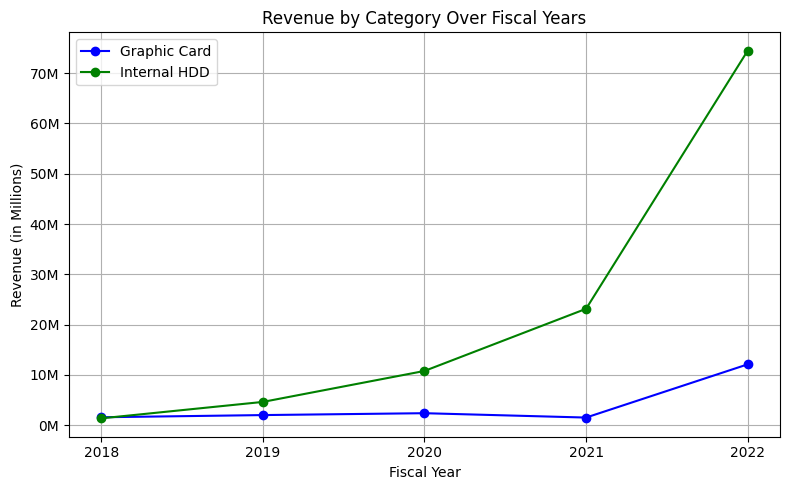

In [536]:
# data for the years and categories
data = {
    'fiscal_year': [2018, 2019, 2020, 2021, 2022],
    'Graphic Card': [1.579097e+06, 2.013284e+06, 2.387499e+06, 1.520041e+06, 1.209958e+07],
    'Internal HDD': [1.364914e+06, 4.628319e+06, 1.078542e+07, 2.314113e+07, 7.445633e+07]
}

# Convert data to DataFrame
df = pd.DataFrame(data)

# Plot the data
plt.figure(figsize=(8, 5))

# Plot for each category
plt.plot(df['fiscal_year'], df['Graphic Card'], marker='o', label='Graphic Card', color='blue')
plt.plot(df['fiscal_year'], df['Internal HDD'], marker='o', label='Internal HDD', color='green')

# Format x-axis and y-axis
plt.xlabel('Fiscal Year')
plt.ylabel('Revenue (in Millions)')
plt.title('Revenue by Category Over Fiscal Years')
plt.legend(loc='best')
plt.grid(True)

# Format x-axis to show years as integers
plt.xticks(df['fiscal_year'], [int(year) for year in df['fiscal_year']])

# Format y-axis to show revenue in millions (M)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.0f}M'.format(x * 1e-6)))
plt.tight_layout()

plt.show()

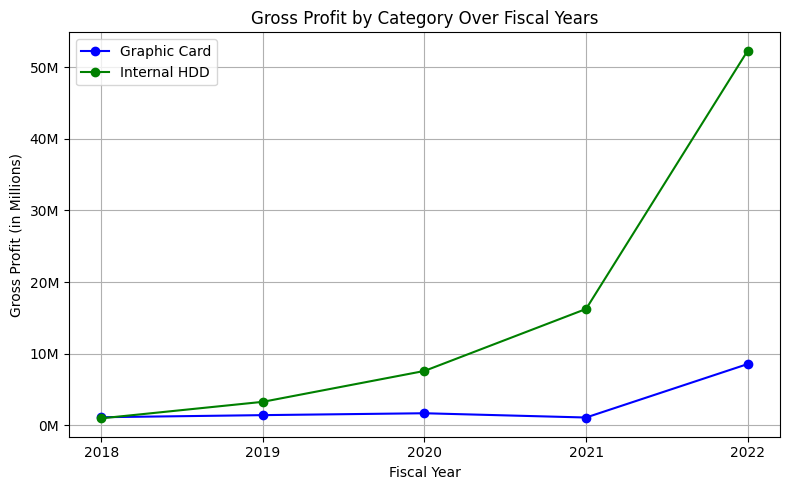

In [537]:
# data for the years and categories
data = {
    'fiscal_year': [2018, 2019, 2020, 2021, 2022],
    'Graphic Card': [1.112818e+06, 1.405212e+06, 1.668872e+06, 1.072589e+06, 8.543124e+06],
    'Internal HDD': [9.573028e+05, 3.264815e+06, 7.580349e+06, 1.624158e+07, 5.232315e+07]
}

# Convert data to DataFrame
df = pd.DataFrame(data)

# Plot the data
plt.figure(figsize=(8, 5))

# Plot for each category
plt.plot(df['fiscal_year'], df['Graphic Card'], marker='o', label='Graphic Card', color='blue')
plt.plot(df['fiscal_year'], df['Internal HDD'], marker='o', label='Internal HDD', color='green')

# Format x-axis and y-axis
plt.xlabel('Fiscal Year')
plt.ylabel('Gross Profit (in Millions)')
plt.title('Gross Profit by Category Over Fiscal Years')
plt.legend(loc='best')
plt.grid(True)

# Format x-axis to show years as integers
plt.xticks(df['fiscal_year'], [int(year) for year in df['fiscal_year']])

# Format y-axis to show gross profit in millions (M)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.0f}M'.format(x * 1e-6)))
plt.tight_layout()

plt.show()

#### Revenue vs. Profit Margin for each category.

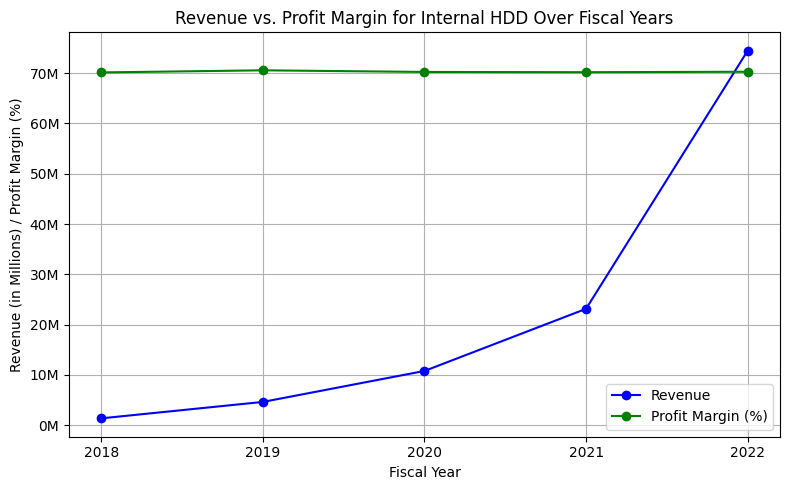

In [538]:
# combined aggregated metrics for Internal HDD from 2018 to 2022
internal_hdd_data = pd.concat([
    aggregate_metrics_2018_df[aggregate_metrics_2018_df['category'] == 'Internal HDD'],
    aggregate_metrics_2019_df[aggregate_metrics_2019_df['category'] == 'Internal HDD'],
    aggregate_metrics_2020_df[aggregate_metrics_2020_df['category'] == 'Internal HDD'],
    aggregate_metrics_2021_df[aggregate_metrics_2021_df['category'] == 'Internal HDD'],
    aggregate_metrics_2022_df[aggregate_metrics_2022_df['category'] == 'Internal HDD']
])
# Plot the data
plt.figure(figsize=(8, 5))

# Plot revenue vs. profit margin for Internal HDD
plt.plot(internal_hdd_data['fiscal_year'], internal_hdd_data['revenue'] / 1e6, 
         marker='o', label='Revenue', color='blue')
plt.plot(internal_hdd_data['fiscal_year'], internal_hdd_data['profit_margin'], 
         marker='o', label='Profit Margin (%)', color='green')

# Format x-axis and y-axis
plt.xlabel('Fiscal Year')
plt.ylabel('Revenue (in Millions) / Profit Margin (%)')
plt.title('Revenue vs. Profit Margin for Internal HDD Over Fiscal Years')
plt.legend(loc='best')
plt.grid(True)

# Format x-axis to show years as integers
plt.xticks(internal_hdd_data['fiscal_year'], [int(year) for year in internal_hdd_data['fiscal_year']])

# Format y-axis to show revenue in millions (M)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.0f}M'.format(x)))

plt.tight_layout()
plt.show()

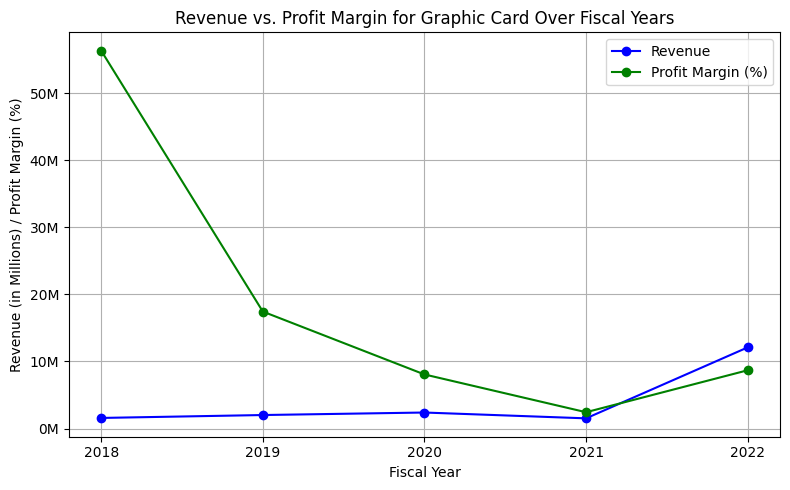

In [539]:
# combine the data for "Graphic Card" from each year
graphic_card_data = pd.concat([
    aggregate_metrics_2018_df[aggregate_metrics_2018_df['category'] == 'Graphic Card'],
    aggregate_metrics_2019_df[aggregate_metrics_2019_df['category'] == 'Graphic Card'],
    aggregate_metrics_2020_df[aggregate_metrics_2020_df['category'] == 'Graphic Card'],
    aggregate_metrics_2021_df[aggregate_metrics_2021_df['category'] == 'Graphic Card'],
    aggregate_metrics_2022_df[aggregate_metrics_2022_df['category'] == 'Graphic Card']
])

# Plot the data
plt.figure(figsize=(8, 5))

# Plot revenue vs. profit margin for Graphic Card
plt.plot(graphic_card_data['fiscal_year'], graphic_card_data['revenue'] / 1e6, 
         marker='o', label='Revenue', color='blue')
plt.plot(graphic_card_data['fiscal_year'], graphic_card_data['profit_margin'], 
         marker='o', label='Profit Margin (%)', color='green')

# Format x-axis and y-axis
plt.xlabel('Fiscal Year')
plt.ylabel('Revenue (in Millions) / Profit Margin (%)')
plt.title('Revenue vs. Profit Margin for Graphic Card Over Fiscal Years')
plt.legend(loc='best')
plt.grid(True)

# Format x-axis to show years as integers
plt.xticks(graphic_card_data['fiscal_year'], [int(year) for year in graphic_card_data['fiscal_year']])

# Format y-axis to show revenue in millions (M)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.0f}M'.format(x)))

plt.tight_layout()
plt.show()

#### Sales Volume vs. Cost per Unit for each category.

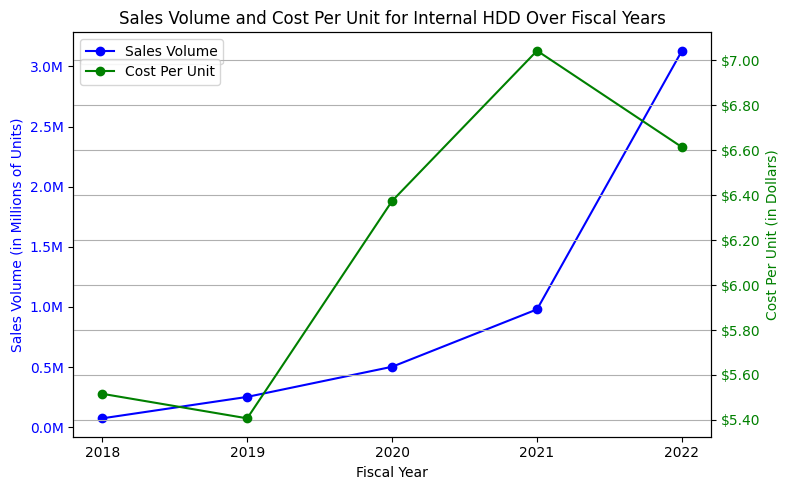

In [540]:
# sample DataFrame concatenation
internal_hdd_data = pd.concat([
    aggregate_metrics_2018_df[aggregate_metrics_2018_df['category'] == 'Internal HDD'],
    aggregate_metrics_2019_df[aggregate_metrics_2019_df['category'] == 'Internal HDD'],
    aggregate_metrics_2020_df[aggregate_metrics_2020_df['category'] == 'Internal HDD'],
    aggregate_metrics_2021_df[aggregate_metrics_2021_df['category'] == 'Internal HDD'],
    aggregate_metrics_2022_df[aggregate_metrics_2022_df['category'] == 'Internal HDD']
])

# Plot the data
fig, ax1 = plt.subplots(figsize=(8, 5))

# Plot Sales Volume on primary y-axis (volume of units sold)
ax1.plot(internal_hdd_data['fiscal_year'], internal_hdd_data['total_sales_volume'] / 1e6, 
         marker='o', color='blue', label='Sales Volume')
ax1.set_xlabel('Fiscal Year')
ax1.set_ylabel('Sales Volume (in Millions of Units)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Format primary y-axis to show values in millions of units
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.1f}M'.format(x)))
ax1.set_xticks(internal_hdd_data['fiscal_year'])

# Create secondary y-axis for Cost Per Unit
ax2 = ax1.twinx()
ax2.plot(internal_hdd_data['fiscal_year'], internal_hdd_data['cost_per_unit'], 
         marker='o', color='green', label='Cost Per Unit')
ax2.set_ylabel('Cost Per Unit (in Dollars)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Format the secondary y-axis ticks
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '${:.2f}'.format(x)))

# Add titles and legends
plt.title('Sales Volume and Cost Per Unit for Internal HDD Over Fiscal Years')
fig.tight_layout()

# Add legends with specified positions
lines_labels = ax1.get_legend_handles_labels()  # Get handles and labels for primary y-axis
ax1.legend(handles=lines_labels[0], labels=lines_labels[1], loc='upper left', bbox_to_anchor=(0, 1))
lines_labels2 = ax2.get_legend_handles_labels()  # Get handles and labels for secondary y-axis
ax2.legend(handles=lines_labels2[0], labels=lines_labels2[1], loc='upper left', bbox_to_anchor=(0, 0.95))

plt.grid(True)
plt.show()

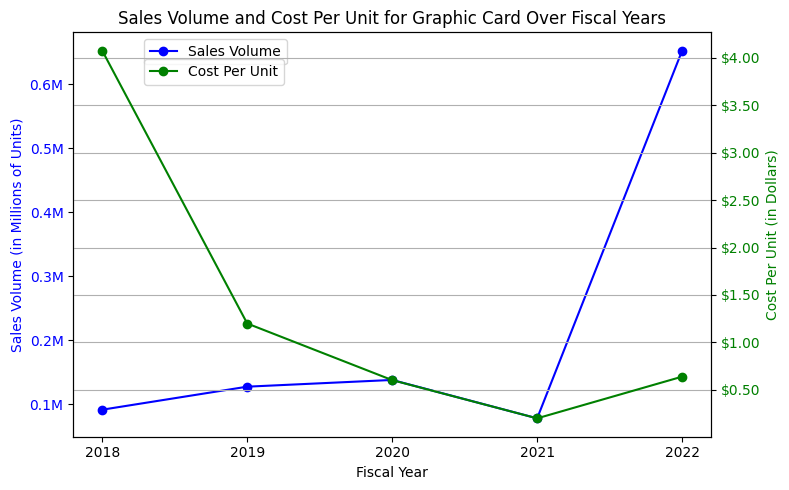

In [541]:
# combine the data for "Graphic Card" from each year
graphic_card_data = pd.concat([
    aggregate_metrics_2018_df[aggregate_metrics_2018_df['category'] == 'Graphic Card'],
    aggregate_metrics_2019_df[aggregate_metrics_2019_df['category'] == 'Graphic Card'],
    aggregate_metrics_2020_df[aggregate_metrics_2020_df['category'] == 'Graphic Card'],
    aggregate_metrics_2021_df[aggregate_metrics_2021_df['category'] == 'Graphic Card'],
    aggregate_metrics_2022_df[aggregate_metrics_2022_df['category'] == 'Graphic Card']
])

# Plot the data
fig, ax1 = plt.subplots(figsize=(8, 5))

# Plot Sales Volume on primary y-axis (volume of units sold)
ax1.plot(graphic_card_data['fiscal_year'], graphic_card_data['total_sales_volume'] / 1e6, 
         marker='o', color='blue', label='Sales Volume')
ax1.set_xlabel('Fiscal Year')
ax1.set_ylabel('Sales Volume (in Millions of Units)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Format primary y-axis to show values in millions of units
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.1f}M'.format(x)))
ax1.set_xticks(graphic_card_data['fiscal_year'])

# Create secondary y-axis for Cost Per Unit
ax2 = ax1.twinx()
ax2.plot(graphic_card_data['fiscal_year'], graphic_card_data['cost_per_unit'], 
         marker='o', color='green', label='Cost Per Unit')
ax2.set_ylabel('Cost Per Unit (in Dollars)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Format the secondary y-axis ticks
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '${:.2f}'.format(x)))

# Add titles and legends
plt.title('Sales Volume and Cost Per Unit for Graphic Card Over Fiscal Years')
fig.tight_layout()

# Add legends with specified positions
lines_labels = ax1.get_legend_handles_labels()  # Get handles and labels for primary y-axis
ax1.legend(handles=lines_labels[0], labels=lines_labels[1], loc='upper left', bbox_to_anchor=(0.1, 1))
lines_labels2 = ax2.get_legend_handles_labels()  # Get handles and labels for secondary y-axis
ax2.legend(handles=lines_labels2[0], labels=lines_labels2[1], loc='upper left', bbox_to_anchor=(0.1, 0.95))

plt.grid(True)
plt.show()

***

### 4. Exploratory Data Analysis (EDA)

#### Descriptive Statistics:<br>
- Calculate mean, median, and standard deviation for revenue, profit, and margin metrics.
- Identify outliers or unusual trends in the data.

#### Descriptive Stratistics for Market:

In [542]:
# define the SQL query for aggregated_by_market
stat_market_query = """
WITH revenue_stats AS (
    SELECT
        total_revenue,
        COUNT(*) OVER () AS total_count,
        ROW_NUMBER() OVER (ORDER BY total_revenue) AS rn_asc,
        ROW_NUMBER() OVER (ORDER BY total_revenue DESC) AS rn_desc
    FROM
        aggregated_by_market
),
median_revenue_calc AS (
    SELECT
        AVG(total_revenue) AS median_revenue
    FROM
        revenue_stats
    WHERE
        rn_asc = rn_desc
        OR rn_asc = rn_desc + 1
),
gross_profit_stats AS (
    SELECT
        total_gross_profit,
        COUNT(*) OVER () AS total_count,
        ROW_NUMBER() OVER (ORDER BY total_gross_profit) AS rn_asc,
        ROW_NUMBER() OVER (ORDER BY total_gross_profit DESC) AS rn_desc
    FROM
        aggregated_by_market
),
median_gross_profit_calc AS (
    SELECT
        AVG(total_gross_profit) AS median_gross_profit
    FROM
        gross_profit_stats
    WHERE
        rn_asc = rn_desc
        OR rn_asc = rn_desc + 1
),
profit_margin_stats AS (
    SELECT
        profit_margin,
        COUNT(*) OVER () AS total_count,
        ROW_NUMBER() OVER (ORDER BY profit_margin) AS rn_asc,
        ROW_NUMBER() OVER (ORDER BY profit_margin DESC) AS rn_desc
    FROM
        aggregated_by_market
),
median_profit_margin_calc AS (
    SELECT
        AVG(profit_margin) AS median_profit_margin
    FROM
        profit_margin_stats
    WHERE
        rn_asc = rn_desc
        OR rn_asc = rn_desc + 1
)
SELECT
    'Revenue' AS metric,
    AVG(total_revenue) AS mean_value,
    (SELECT median_revenue FROM median_revenue_calc) AS median_value,
    SQRT(SUM((total_revenue - (SELECT AVG(total_revenue) FROM aggregated_by_market)) * 
             (total_revenue - (SELECT AVG(total_revenue) FROM aggregated_by_market))) / 
         COUNT(*)) AS stddev_value
FROM
    aggregated_by_market
UNION ALL
SELECT
    'Gross Profit' AS metric,
    AVG(total_gross_profit) AS mean_value,
    (SELECT median_gross_profit FROM median_gross_profit_calc) AS median_value,
    SQRT(SUM((total_gross_profit - (SELECT AVG(total_gross_profit) FROM aggregated_by_market)) * 
             (total_gross_profit - (SELECT AVG(total_gross_profit) FROM aggregated_by_market))) / 
         COUNT(*)) AS stddev_value
FROM
    aggregated_by_market
UNION ALL
SELECT
    'Profit Margin' AS metric,
    AVG(profit_margin) AS mean_value,
    (SELECT median_profit_margin FROM median_profit_margin_calc) AS median_value,
    SQRT(SUM((profit_margin - (SELECT AVG(profit_margin) FROM aggregated_by_market)) * 
             (profit_margin - (SELECT AVG(profit_margin) FROM aggregated_by_market))) / 
         COUNT(*)) AS stddev_value
FROM
    aggregated_by_market;
"""

des_stat_market = pd.read_sql_query(stat_market_query, con)
print(des_stat_market)

          metric    mean_value  median_value  stddev_value
0        Revenue  3.205774e+06  1.686723e+06  5.072787e+06
1   Gross Profit  6.085678e+07  2.588960e+07  1.013843e+08
2  Profit Margin  7.030926e+01  7.030760e+01  2.314604e-02


#### Analysis:<br>

Revenue<br>
Mean Revenue: $3,205,774<br>
Median Revenue: $1,686,723<br>
Standard Deviation: $5,072,787<br>

The mean revenue is significantly higher than the median revenue, which indicates a right-skewed distribution. This suggests that there might be a few exceptionally high revenue values that are pulling the mean up.<br>
The standard deviation is quite large compared to the mean, further indicating high variability in the revenue values.<br>

Gross Profit<br>
Mean Gross Profit: $60,856,780<br>
Median Gross Profit: $25,889,600<br>
Standard Deviation: $101,384,300<br>

Similar to revenue, the mean gross profit is much higher than the median, suggesting a right-skewed distribution with some extremely high gross profit values.<br>
The standard deviation is very high relative to the mean, indicating substantial variability in gross profit figures.

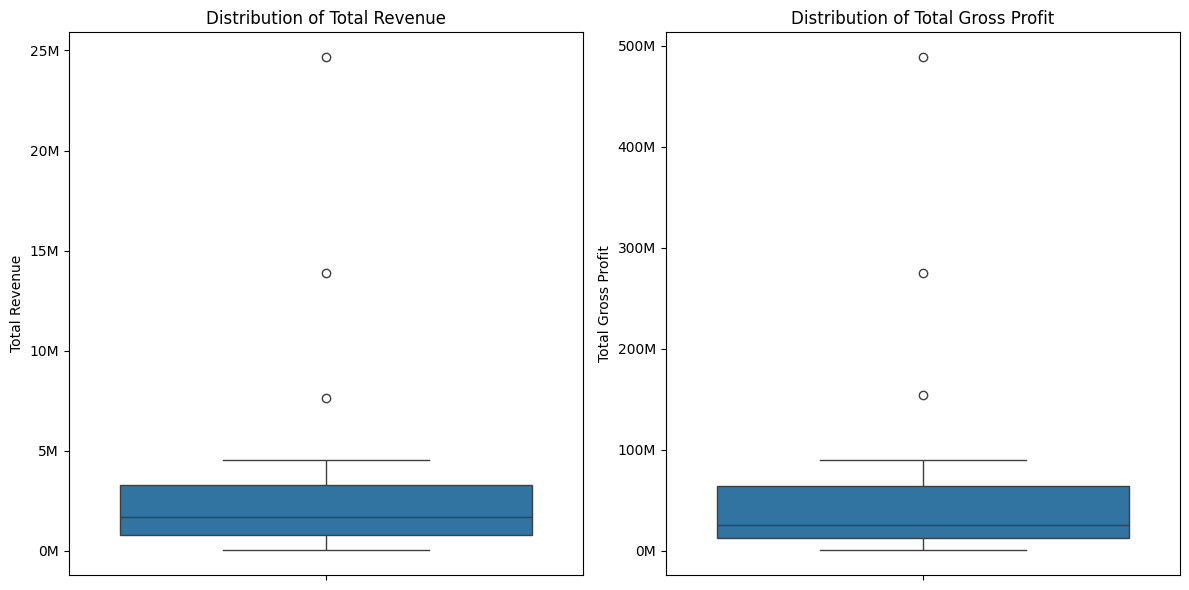

In [551]:
# fetch raw data for plotting
query = """
SELECT
    total_revenue,
    total_gross_profit
FROM
    aggregated_by_market
"""
data = pd.read_sql_query(query, con)

# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Plot boxplot for Total Revenue
plt.subplot(1, 2, 1)
sns.boxplot(y=data['total_revenue'])
plt.title('Distribution of Total Revenue')
plt.ylabel('Total Revenue')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x/1e6)}M'))

# Plot boxplot for Total Gross Profit
plt.subplot(1, 2, 2)
sns.boxplot(y=data['total_gross_profit'])
plt.title('Distribution of Total Gross Profit')
plt.ylabel('Total Gross Profit')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x/1e6)}M'))

# Adjust layout
plt.tight_layout()
plt.show()

Profit Margin<br>
Mean Profit Margin: 70.31%<br>
Median Profit Margin: 70.31%<br>
Standard Deviation: 0.02%<br>

The mean and median profit margins are nearly identical, suggesting a symmetric distribution around the central value.<br>
The very small standard deviation indicates low variability in profit margins.

#### Descriptive Stratistics for Platform:

In [543]:
# define the SQL query
stat_platform_query = """
WITH revenue_stats AS (
    SELECT
        total_revenue,
        COUNT(*) OVER () AS total_count,
        ROW_NUMBER() OVER (ORDER BY total_revenue) AS rn_asc,
        ROW_NUMBER() OVER (ORDER BY total_revenue DESC) AS rn_desc
    FROM
        aggregated_by_platform
),
median_revenue_calc AS (
    SELECT
        AVG(total_revenue) AS median_revenue
    FROM
        revenue_stats
    WHERE
        rn_asc = rn_desc
        OR rn_asc = rn_desc + 1
),
gross_profit_stats AS (
    SELECT
        total_gross_profit,
        COUNT(*) OVER () AS total_count,
        ROW_NUMBER() OVER (ORDER BY total_gross_profit) AS rn_asc,
        ROW_NUMBER() OVER (ORDER BY total_gross_profit DESC) AS rn_desc
    FROM
        aggregated_by_platform
),
median_gross_profit_calc AS (
    SELECT
        AVG(total_gross_profit) AS median_gross_profit
    FROM
        gross_profit_stats
    WHERE
        rn_asc = rn_desc
        OR rn_asc = rn_desc + 1
),
profit_margin_stats AS (
    SELECT
        profit_margin,
        COUNT(*) OVER () AS total_count,
        ROW_NUMBER() OVER (ORDER BY profit_margin) AS rn_asc,
        ROW_NUMBER() OVER (ORDER BY profit_margin DESC) AS rn_desc
    FROM
        aggregated_by_platform
),
median_profit_margin_calc AS (
    SELECT
        AVG(profit_margin) AS median_profit_margin
    FROM
        profit_margin_stats
    WHERE
        rn_asc = rn_desc
        OR rn_asc = rn_desc + 1
)
SELECT
    'Revenue' AS metric,
    AVG(total_revenue) AS mean_value,
    (SELECT median_revenue FROM median_revenue_calc) AS median_value,
    SQRT(SUM((total_revenue - (SELECT AVG(total_revenue) FROM aggregated_by_platform)) * 
             (total_revenue - (SELECT AVG(total_revenue) FROM aggregated_by_platform))) / 
         COUNT(*)) AS stddev_value
FROM
    aggregated_by_platform
UNION ALL
SELECT
    'Gross Profit' AS metric,
    AVG(total_gross_profit) AS mean_value,
    (SELECT median_gross_profit FROM median_gross_profit_calc) AS median_value,
    SQRT(SUM((total_gross_profit - (SELECT AVG(total_gross_profit) FROM aggregated_by_platform)) * 
             (total_gross_profit - (SELECT AVG(total_gross_profit) FROM aggregated_by_platform))) / 
         COUNT(*)) AS stddev_value
FROM
    aggregated_by_platform
UNION ALL
SELECT
    'Profit Margin' AS metric,
    AVG(profit_margin) AS mean_value,
    (SELECT median_profit_margin FROM median_profit_margin_calc) AS median_value,
    SQRT(SUM((profit_margin - (SELECT AVG(profit_margin) FROM aggregated_by_platform)) * 
             (profit_margin - (SELECT AVG(profit_margin) FROM aggregated_by_platform))) / 
         COUNT(*)) AS stddev_value
FROM
    aggregated_by_platform;
"""

des_stat_platform = pd.read_sql_query(stat_platform_query, con)
print(des_stat_platform)

          metric    mean_value  median_value  stddev_value
0        Revenue  4.327795e+07  6.096251e+07  1.768456e+07
1   Gross Profit  8.215666e+08  1.155682e+09  3.341151e+08
2  Profit Margin  7.031065e+01  7.031197e+01  1.316394e-03


#### Descriptive Stratistics for Channel:

In [544]:
# define the SQL query for aggregated_by_channel
stat_channel_query = """
WITH revenue_stats AS (
    SELECT
        total_revenue,
        COUNT(*) OVER () AS total_count,
        ROW_NUMBER() OVER (ORDER BY total_revenue) AS rn_asc,
        ROW_NUMBER() OVER (ORDER BY total_revenue DESC) AS rn_desc
    FROM
        aggregated_by_channel
),
median_revenue_calc AS (
    SELECT
        AVG(total_revenue) AS median_revenue
    FROM
        revenue_stats
    WHERE
        rn_asc = rn_desc
        OR rn_asc = rn_desc + 1
),
gross_profit_stats AS (
    SELECT
        total_gross_profit,
        COUNT(*) OVER () AS total_count,
        ROW_NUMBER() OVER (ORDER BY total_gross_profit) AS rn_asc,
        ROW_NUMBER() OVER (ORDER BY total_gross_profit DESC) AS rn_desc
    FROM
        aggregated_by_channel
),
median_gross_profit_calc AS (
    SELECT
        AVG(total_gross_profit) AS median_gross_profit
    FROM
        gross_profit_stats
    WHERE
        rn_asc = rn_desc
        OR rn_asc = rn_desc + 1
),
profit_margin_stats AS (
    SELECT
        profit_margin,
        COUNT(*) OVER () AS total_count,
        ROW_NUMBER() OVER (ORDER BY profit_margin) AS rn_asc,
        ROW_NUMBER() OVER (ORDER BY profit_margin DESC) AS rn_desc
    FROM
        aggregated_by_channel
),
median_profit_margin_calc AS (
    SELECT
        AVG(profit_margin) AS median_profit_margin
    FROM
        profit_margin_stats
    WHERE
        rn_asc = rn_desc
        OR rn_asc = rn_desc + 1
)
SELECT
    'Revenue' AS metric,
    AVG(total_revenue) AS mean_value,
    (SELECT median_revenue FROM median_revenue_calc) AS median_value,
    SQRT(SUM((total_revenue - (SELECT AVG(total_revenue) FROM aggregated_by_channel)) * 
             (total_revenue - (SELECT AVG(total_revenue) FROM aggregated_by_channel))) / 
         COUNT(*)) AS stddev_value
FROM
    aggregated_by_channel
UNION ALL
SELECT
    'Gross Profit' AS metric,
    AVG(total_gross_profit) AS mean_value,
    (SELECT median_gross_profit FROM median_gross_profit_calc) AS median_value,
    SQRT(SUM((total_gross_profit - (SELECT AVG(total_gross_profit) FROM aggregated_by_channel)) * 
             (total_gross_profit - (SELECT AVG(total_gross_profit) FROM aggregated_by_channel))) / 
         COUNT(*)) AS stddev_value
FROM
    aggregated_by_channel
UNION ALL
SELECT
    'Profit Margin' AS metric,
    AVG(profit_margin) AS mean_value,
    (SELECT median_profit_margin FROM median_profit_margin_calc) AS median_value,
    SQRT(SUM((profit_margin - (SELECT AVG(profit_margin) FROM aggregated_by_channel)) * 
             (profit_margin - (SELECT AVG(profit_margin) FROM aggregated_by_channel))) / 
         COUNT(*)) AS stddev_value
FROM
    aggregated_by_channel;
"""

des_stat_channel = pd.read_sql_query(stat_channel_query, con)
print(des_stat_channel)

          metric    mean_value  median_value  stddev_value
0        Revenue  2.885197e+07  1.379113e+07  2.398439e+07
1   Gross Profit  5.477111e+08  2.614959e+08  4.484823e+08
2  Profit Margin  7.031071e+01  7.031018e+01  6.329277e-03


#### Descriptive Stratistics for Customer:

In [546]:
# define the SQL query for aggregated_customer
stat_customer_query = """
WITH revenue_per_customer_stats AS (
    SELECT
        revenue_per_customer,
        COUNT(*) OVER () AS total_count,
        ROW_NUMBER() OVER (ORDER BY revenue_per_customer) AS rn_asc,
        ROW_NUMBER() OVER (ORDER BY revenue_per_customer DESC) AS rn_desc
    FROM
        aggregated_customer
),
median_revenue_per_customer_calc AS (
    SELECT
        AVG(revenue_per_customer) AS median_revenue_per_customer
    FROM
        revenue_per_customer_stats
    WHERE
        rn_asc = rn_desc
        OR rn_asc = rn_desc + 1
),
gross_profit_per_customer_stats AS (
    SELECT
        gross_profit_per_customer,
        COUNT(*) OVER () AS total_count,
        ROW_NUMBER() OVER (ORDER BY gross_profit_per_customer) AS rn_asc,
        ROW_NUMBER() OVER (ORDER BY gross_profit_per_customer DESC) AS rn_desc
    FROM
        aggregated_customer
),
median_gross_profit_per_customer_calc AS (
    SELECT
        AVG(gross_profit_per_customer) AS median_gross_profit_per_customer
    FROM
        gross_profit_per_customer_stats
    WHERE
        rn_asc = rn_desc
        OR rn_asc = rn_desc + 1
),
discount_customer_stats AS (
    SELECT
        discounts_customer,
        COUNT(*) OVER () AS total_count,
        ROW_NUMBER() OVER (ORDER BY discounts_customer) AS rn_asc,
        ROW_NUMBER() OVER (ORDER BY discounts_customer DESC) AS rn_desc
    FROM
        aggregated_customer
),
median_discount_customer_calc AS (
    SELECT
        AVG(discounts_customer) AS median_discount_customer
    FROM
        discount_customer_stats
    WHERE
        rn_asc = rn_desc
        OR rn_asc = rn_desc + 1
)
SELECT
    'Revenue Per Customer' AS metric,
    AVG(revenue_per_customer) AS mean_value,
    (SELECT median_revenue_per_customer FROM median_revenue_per_customer_calc) AS median_value,
    SQRT(SUM((revenue_per_customer - (SELECT AVG(revenue_per_customer) FROM aggregated_customer)) * 
             (revenue_per_customer - (SELECT AVG(revenue_per_customer) FROM aggregated_customer))) / 
         COUNT(*)) AS stddev_value
FROM
    aggregated_customer
UNION ALL
SELECT
    'Gross Profit Per Customer' AS metric,
    AVG(gross_profit_per_customer) AS mean_value,
    (SELECT median_gross_profit_per_customer FROM median_gross_profit_per_customer_calc) AS median_value,
    SQRT(SUM((gross_profit_per_customer - (SELECT AVG(gross_profit_per_customer) FROM aggregated_customer)) * 
             (gross_profit_per_customer - (SELECT AVG(gross_profit_per_customer) FROM aggregated_customer))) / 
         COUNT(*)) AS stddev_value
FROM
    aggregated_customer
UNION ALL
SELECT
    'Discount Customer' AS metric,
    AVG(discounts_customer) AS mean_value,
    (SELECT median_discount_customer FROM median_discount_customer_calc) AS median_value,
    SQRT(SUM((discounts_customer - (SELECT AVG(discounts_customer) FROM aggregated_customer)) * 
             (discounts_customer - (SELECT AVG(discounts_customer) FROM aggregated_customer))) / 
         COUNT(*)) AS stddev_value
FROM
    aggregated_customer;
"""

des_stat_customer = pd.read_sql_query(stat_customer_query, con)
print(des_stat_customer)

                      metric     mean_value   median_value   stddev_value
0       Revenue Per Customer  414143.105546  201560.317900  474468.038990
1  Gross Profit Per Customer  291226.175998  141760.103300  333684.207320
2          Discount Customer     681.120460     328.568595     841.555268


#### Trend Analysis:<br>
- Plot revenue, profit, and margin over time to visualize trends.
- Use time series analysis to forecast future revenue and profit.

#### Segment Analysis:<br>
- Break down revenue and profit by platform, market, region, and category.
- Identify which segments contribute most to overall profitability.

#### Correlation Analysis:<br>
- Analyze the relationship between different metrics (e.g., how does discount percentage affect net profit?).
- Look for correlations between market conditions and profitability.

***

### 5. Identifying Problems or Questions to Address

#### Profitability Issues:<br>
- Are certain markets or platforms less profitable? If so, why?
- Is there a declining trend in any key categories or segments?
#### Market Shifts:<br>
- Are there shifts in revenue from one platform to another (e.g., from Brick & Mortar to E-Commerce)?
- Are there emerging markets or declining markets based on the data?
#### Cost Efficiency:<br>
- Are manufacturing costs rising, and how does this affect profit margins?
- Are discounts eroding profitability in certain markets or for certain customers?

***

### 6. Research and Contextual Understanding

#### Industry Benchmarks:<br>
- Research industry standards for profit margins, cost structures, and market share to compare with your findings.
#### Economic Factors:<br>
- Consider external economic factors that may have influenced market trends (e.g., currency fluctuations, economic downturns).
#### Competitor Analysis:
- Research competitors' performance in similar markets to understand potential threats or opportunities.


***

### 7. Hypothesis Formation and Testing

#### Based on the EDA, form hypotheses about what drives revenue and profit. For example:<br>
- "E-Commerce platform is more profitable due to lower overhead costs."
- "The market in Japan has seen a decline due to increased competition."
#### Design experiments or statistical tests to validate these hypotheses.

***

### 8. Visualization and Reporting

#### Dashboards:<br>
- Create visualizations to represent the trends, comparisons, and insights derived from the data.
- Use tools like Power BI, Tableau, or Python libraries like Matplotlib/Seaborn.
#### Report:<br>
- Compile a report summarizing your findings, insights, and recommendations based on the analysis.
- Ensure that the report answers the key questions posed at the beginning of the project.

***

### 9. Actionable Recommendations

#### Based on the analysis, provide recommendations for business strategies to improve revenue, optimize profits, and adapt to market shifts. These could include:<br>
- Focusing more on profitable platforms or markets.
- Reducing costs in certain product lines.
- Increasing marketing efforts in emerging markets or declining segments.